# The impact of hand washing at Vienna General

In [1]:
# Specify libraries
import process.improvement as pi
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

%matplotlib inline

In [2]:
# dataset URL
dataset_url = r'https://raw.githubusercontent.com/jimlehner/ddi-datasets/main/data/deaths-and-births-at-vienna-general-1833-to-1858.csv'

In [3]:
def get_data() -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
df = get_data()
df.head()

,Clinic,Employee,Year,Births,Deaths,Death-to-Birth Ratio (%),Note
0,1st Clinic,Students & Doctors,1833,3737,197,5.3,Second clinic started
1,1st Clinic,Students & Doctors,1834,2657,205,7.7,NaN
2,1st Clinic,Students & Doctors,1835,2573,143,5.6,NaN
3,1st Clinic,Students & Doctors,1836,2677,200,7.5,NaN
4,1st Clinic,Students & Doctors,1837,2765,251,9.1,NaN


In [4]:
# Check the data types
df.dtypes

Clinic                       object
Employee                     object
Year                          int64
Births                        int64
Deaths                        int64
Death-to-Birth Ratio (%)    float64
Note                         object
dtype: object

In [5]:
# Make Year column dtype str
df['Year'] = df['Year'].astype('string')
df.dtypes

Clinic                       object
Employee                     object
Year                         string
Births                        int64
Deaths                        int64
Death-to-Birth Ratio (%)    float64
Note                         object
dtype: object

In [6]:
# Split dataframe according to clinic
first_clinic = df[df['Clinic'] == '1st Clinic']
second_clinic = df[df['Clinic'] == '2nd Clinic'].reset_index(drop=True)

## Bar chart of death-to-birth ratios

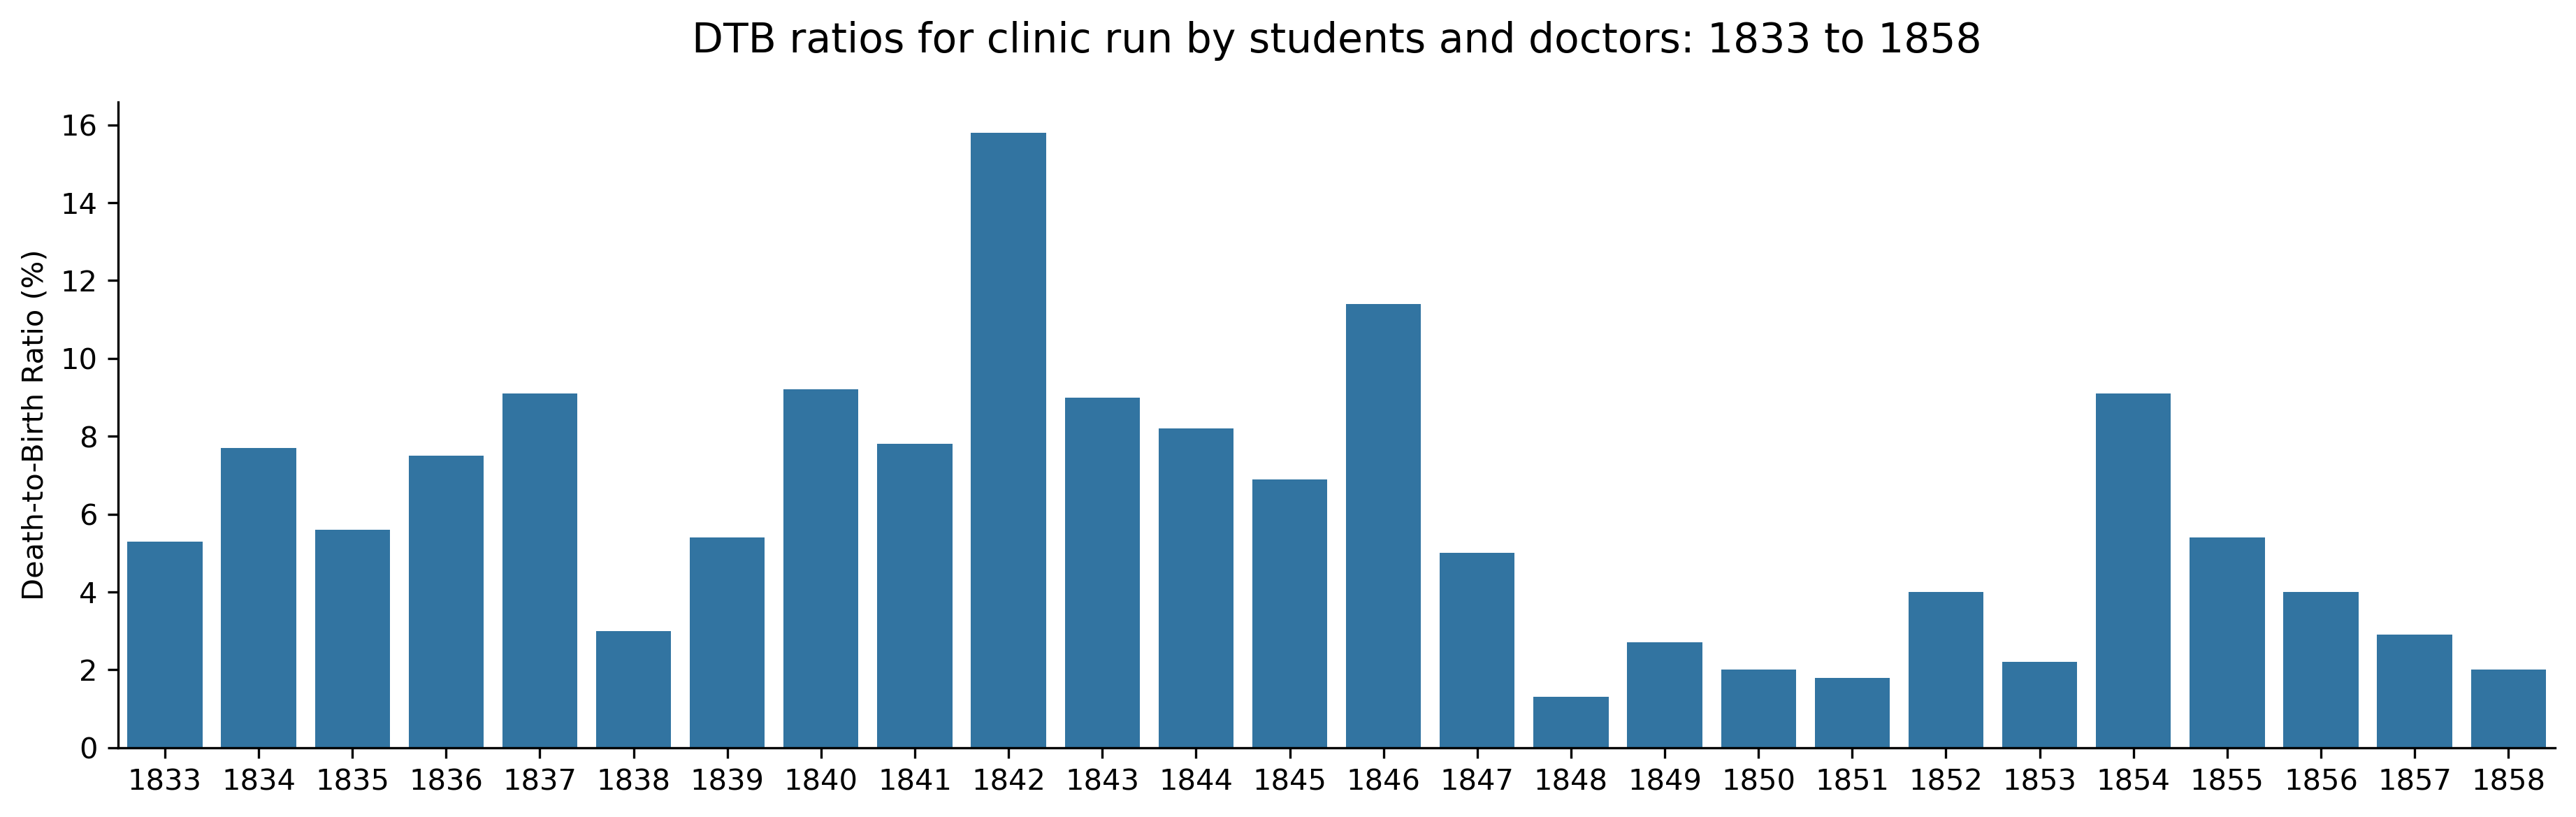

In [7]:
# Figure 2 - bar chart of death-to-birth ratios at the first clinic run by students and doctors
pi.bar_chart(first_clinic, 'Year', 'Death-to-Birth Ratio (%)', 
             title='DTB ratios for clinic run by students and doctors: 1833 to 1858',
            show_labels='Off', y_label='Death-to-Birth Ratio (%)', dpi=300, figsize=(15,4))

## Time series of death-to-birth ratios

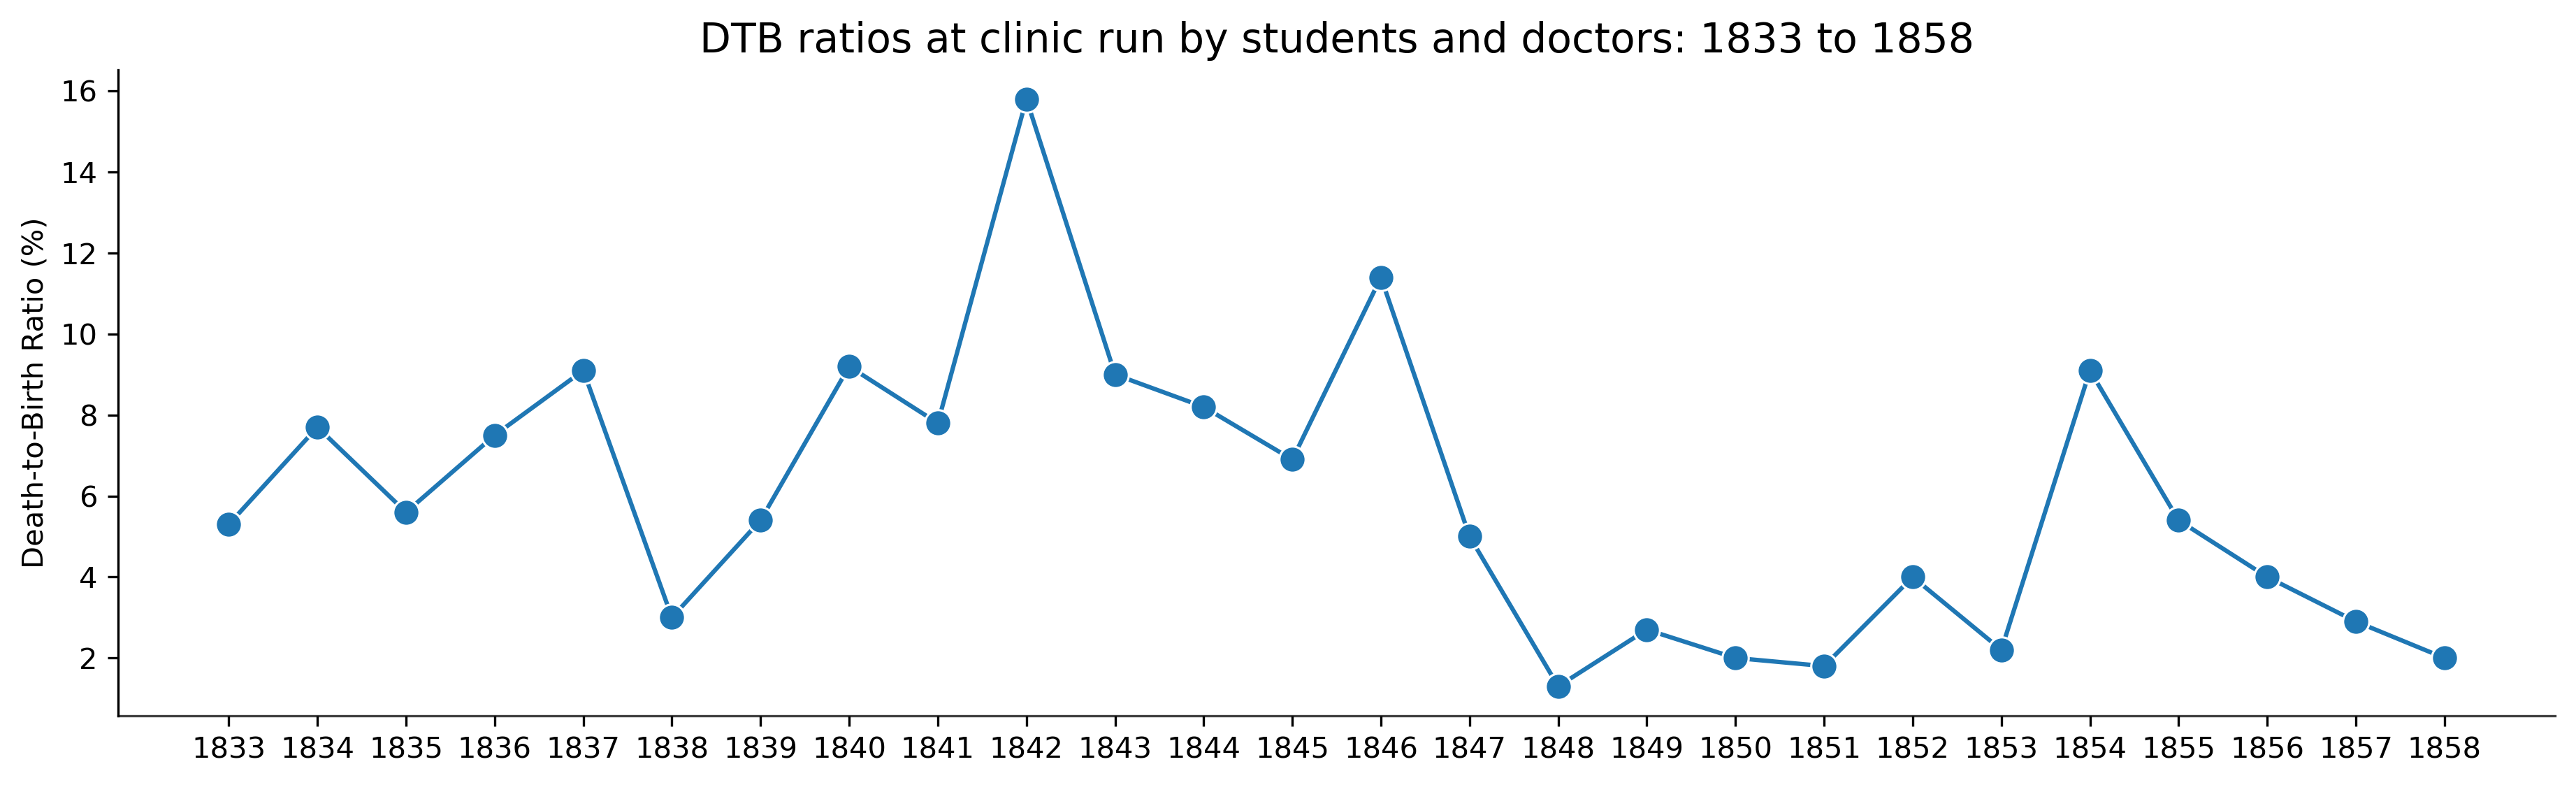

In [8]:
# Figure 3 - Time series fo death-to-birth ratios at first clinic (students and doctors)
fig, ax = plt.subplots(figsize=(15,4), dpi=300)

sns.lineplot(data=first_clinic, x='Year', y='Death-to-Birth Ratio (%)',
            marker='o', markersize=9)

ax.spines[['top','right']].set_visible(False)
ax.spines['bottom'].set_alpha(0.75)
ax.set_xlabel('')

plt.title('DTB ratios at clinic run by students and doctors: 1833 to 1858', fontsize=14)

plt.show()

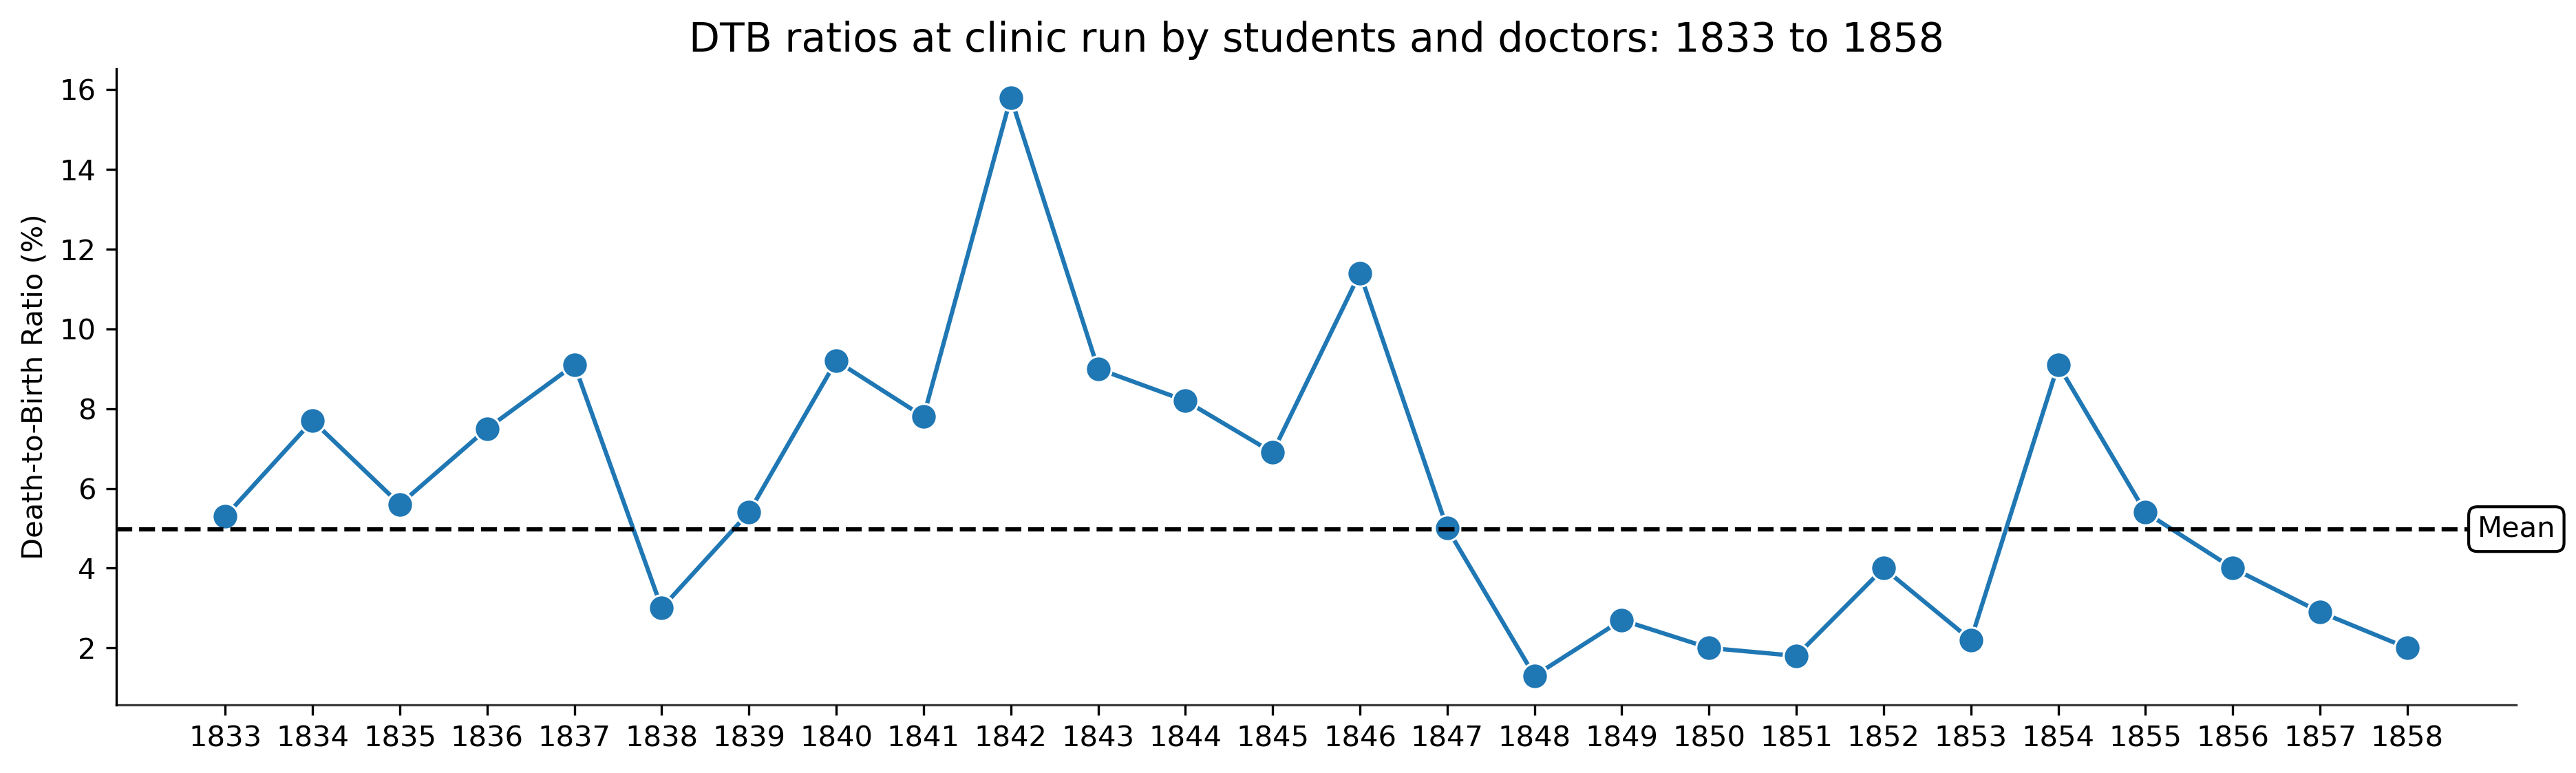

In [9]:
# Figure 4 - Time series of death-to-birth ratios at first clinic (students and doctors) with mean
# Calculate mean
first_clinic_mean = round(df['Death-to-Birth Ratio (%)'].mean(),3)
fig, ax = plt.subplots(figsize=(15,4), dpi=300)

sns.lineplot(data=first_clinic, x='Year', y='Death-to-Birth Ratio (%)',
            marker='o', markersize=9)

# Show mean 
ax.axhline(first_clinic_mean, ls='--',c='black')

# Add mean label 
# bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="red", lw=1)
bbox_props_centerline = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
ax.text(ax.get_xlim()[1] * 1.0, first_clinic_mean, 'Mean', color='black', ha='center', va='center', bbox=bbox_props_centerline)

# Set spine parameters
ax.spines[['top','right']].set_visible(False)
ax.spines['bottom'].set_alpha(0.75)
# Remove xlabel
ax.set_xlabel('')

# Set title
plt.title('DTB ratios at clinic run by students and doctors: 1833 to 1858', fontsize=14)

plt.show()

## Process behavior chart of death-to-birth ratios for clinic run by students and doctors (1st clinic)

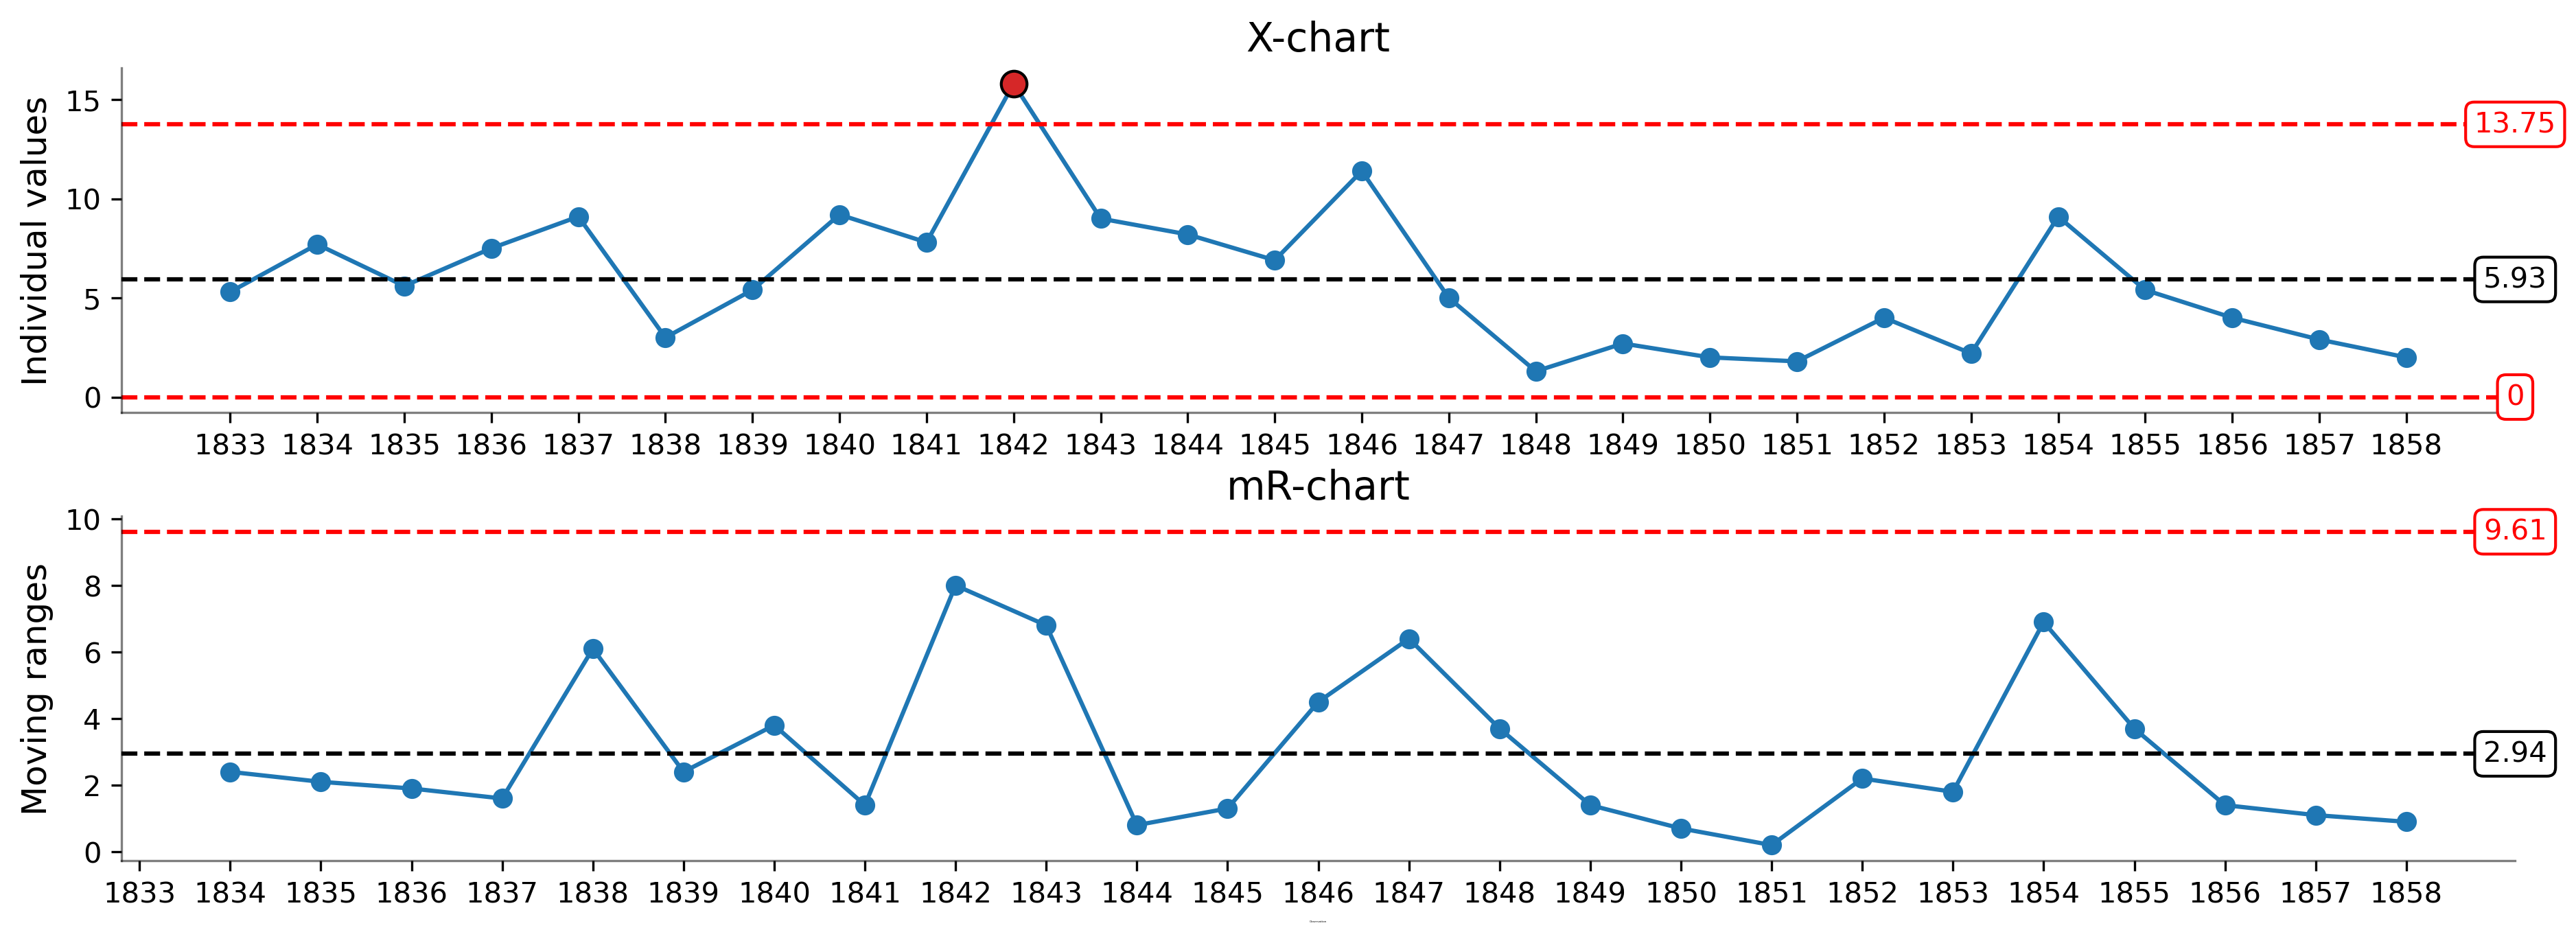

In [10]:
first_clinic_pbc_results = pi.pbc(first_clinic, 'Death-to-Birth Ratio (%)', 'Year', fig_size=(15,5))

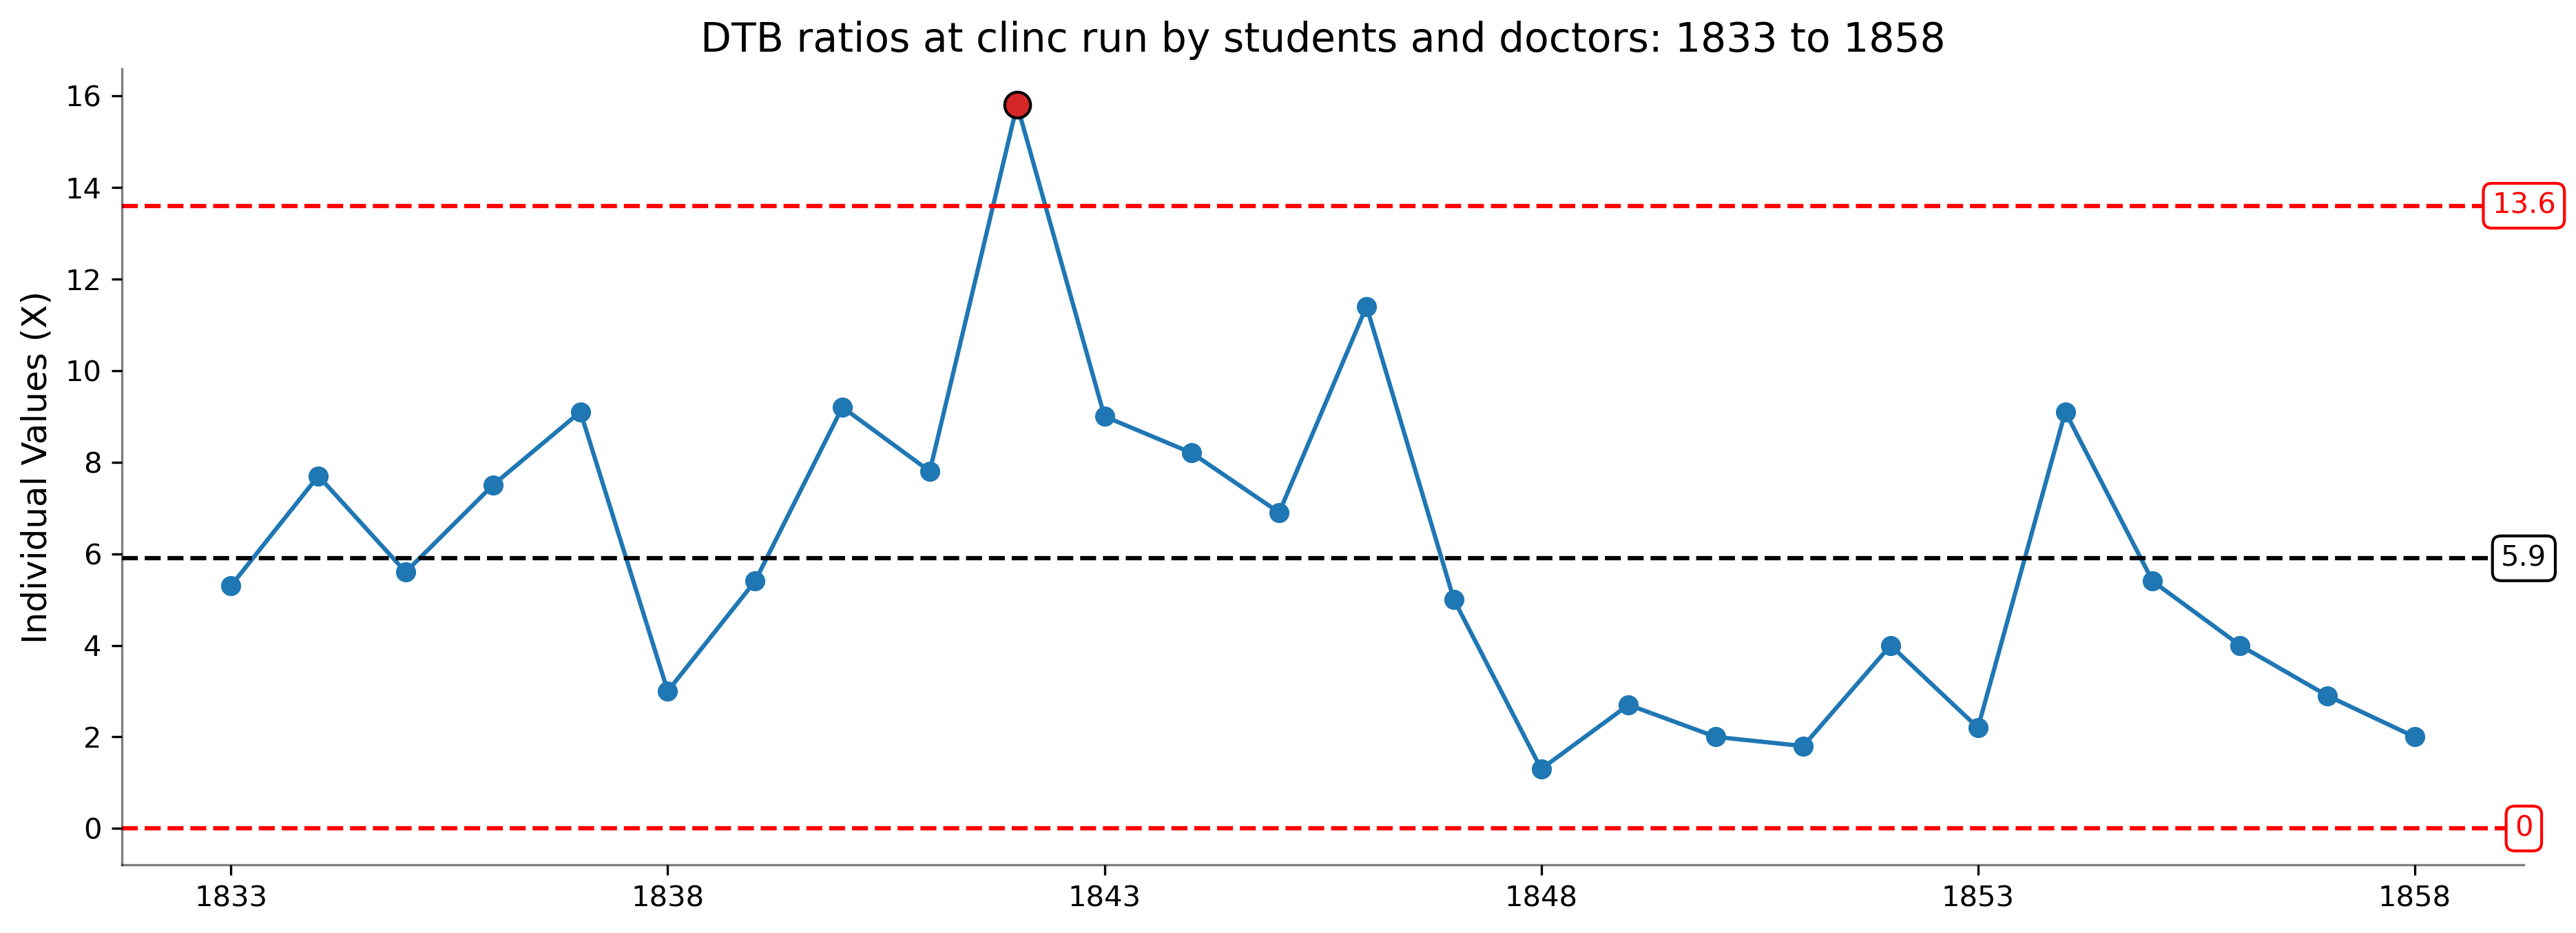

In [11]:
# x-chart of death-to-birth ratios
first_clinic_xchart_results = pi.xchart(first_clinic,'Death-to-Birth Ratio (%)', 'Year', 
                                        title='DTB ratios at clinc run by students and doctors: 1833 to 1858',
                                        fig_size=(15,5))

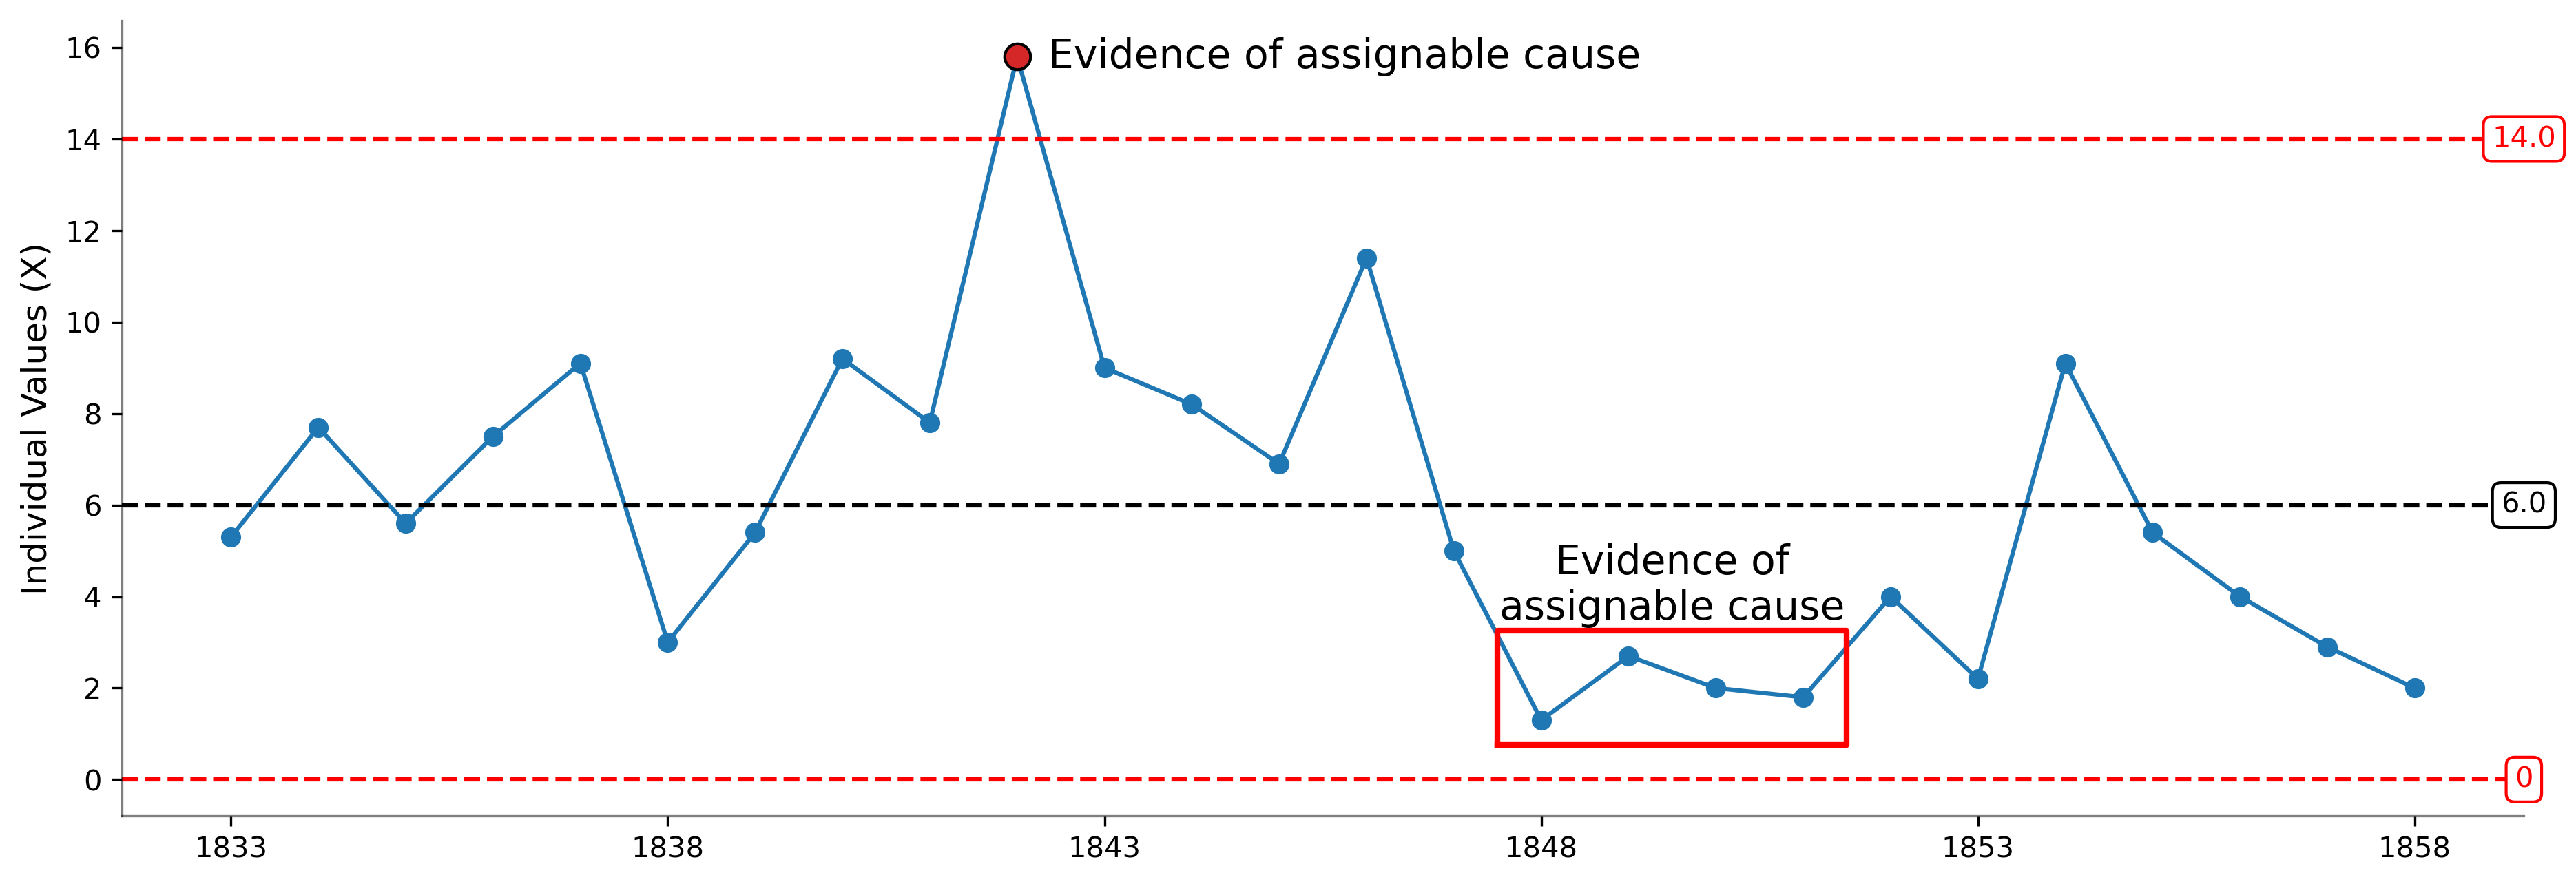

In [34]:
# Specify round_value
round_value = 0

# Specify tickinterval
tickinterval = 5

# Disaggregate the dataframe 
data = first_clinic["Death-to-Birth Ratio (%)"]
moving_ranges = round(abs(data.diff()),round_value)
labels = first_clinic["Year"]

# Add moving ranges to df as column
first_clinic = first_clinic.copy()
first_clinic['Moving Ranges'] = pd.Series(moving_ranges)

# Calculate the mean
mean = round(data.mean(),round_value)
# Calculate the average moving range 
AmR = round(moving_ranges.mean(),round_value)

# Define the value of C1 and C2and calculate the UPL and LPL
C1 = 2.660
C2 = 3.268
# Calculate the process limits
UPL = round(mean + (C1*AmR),round_value)
LPL = round(mean - (C1*AmR),round_value)
# Calculate process limit range (PLR)
PLR = UPL - LPL
# Conditionally determine LPL if LPL is less than zero
LPL = max(LPL,0)
# Calculate the Upper Range Limit
URL = round(C2*AmR,round_value)

# Create masking parameters for values greater than and less than the process limits on X-chart
upper_lim = np.ma.masked_where(data < UPL, data)
lower_lim = np.ma.masked_where(data > LPL, data)
# Create masking parameters for values greater than URL on mR-chart
url_greater = np.ma.masked_where(moving_ranges <= URL, moving_ranges)
url_less = np.ma.masked_where(moving_ranges > URL, moving_ranges)

# Create list of tuples that specify value and color for mean, AmR, UPL, LPL, and URL
xchart_lines = [(mean,'black'), (UPL,'red'), (LPL,'red')]
mrchart_lines = [(AmR,'black'), (URL,'red')]
# Create list of tuples with y-coordinate and labels for x-chart process limits and centerline 
xchart_labels = [(UPL,UPL),(LPL,LPL),(mean,mean)]
# Create list of tuples with y-coordinate and labels for mR-chart process limit and centerline
mrchart_labels = [(URL,URL),(AmR,AmR)]

# Generate the X-chart
fig, ax = plt.subplots(figsize=(15,5), dpi=300)

# Plot data 
ax.plot(labels, data, marker='o')

# Add masking parameters to color values outside process limits
ax.plot(labels, lower_lim, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)
ax.plot(labels, upper_lim, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)

# Add text labels for limits and centerline
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="red", lw=1)
bbox_props_centerlines = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
ax.text(ax.get_xlim()[1] * 1.0, UPL, UPL, color='red', ha='center', va='center', bbox=bbox_props)
ax.text(ax.get_xlim()[1] * 1.0, LPL, LPL, color='red', ha='center', va='center', bbox=bbox_props)
ax.text(ax.get_xlim()[1] * 1.0, mean, mean, color='black', ha='center', va='center', bbox=bbox_props_centerlines)

# Add centerline and process limits 
for value, color in xchart_lines:
    plt.axhline(value, ls='--', c=color)

# Specify spine visibility 
ax.spines[['top','right']].set_visible(False)
ax.spines[['left','bottom']].set_alpha(0.5)

# Set the x-tick labels with increased intervals
tick_interval = tickinterval  # Increase this value to increase the spacing between ticks
tick_positions = np.arange(0, len(labels), tick_interval)
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center') 

# Specify axis labels and title
plt.xlabel("",fontsize=12)
plt.ylabel("Individual Values (X)", fontsize=12)
plt.title("", fontsize=14)

# Add box for highlighting range of values satisfying Rule 3
# start_index = 14.5  # Start index of the highlighted area
# end_index = 18.5    # End index of the highlighted area
# plt.axvspan(start_index, end_index, color='red', alpha=0.5, label='Highlighted Range')

# Add annotation for highlighting value that satisfies Rule 1
plt.annotate('Evidence of assignable cause', 
             xy=(0,0),  # x, y coordinates of the annotation
             xytext=(12.75, 15.8),  # Position of the text
             fontsize=14,
             color='black',
             horizontalalignment='center',
             verticalalignment='center')


# Add box for highlighting range of values satisfying Rule 3
start_index = 14.5  # Start index of the highlighted area
end_index = 18.5    # End index of the highlighted area
y_min = 0.75       # Minimum height of the box
y_max = 3.25       # Maximum height of the box
# plt.fill_betweenx(y=[y_min, y_max], x1=start_index, x2=end_index, color='orange', alpha=0.5, label='Highlighted Range')

# Add a border using plt.plot()
plt.plot([start_index, end_index, end_index, start_index, start_index], 
         [y_min, y_min, y_max, y_max, y_min], color='red', linewidth=2)


# Adding annotations
plt.annotate('Evidence of\nassignable cause', 
             xy=(0, 0),  # x, y coordinates of the annotation
             xytext=(16.5, 3.5),  # Position of the text
             fontsize=14,
             color='black',
             horizontalalignment='center')


# Show plot
plt.show()

In [ ]:
# Highlight specific points in red for the first DataFrame
highlight_years_before = [1848,1849,1850,1851]  # Example years to highlight in red
highlight_data_before = first_clinic[first_clinic['Year'].isin(highlight_years_before)]

## Comparitive process behavior chart analysis

In [299]:
first_clinic.head(3)

,Clinic,Employee,Year,Births,Deaths,Death-to-Birth Ratio (%),Note
0,1st Clinic,Students & Doctors,1833,3737,197,5.3,Second clinic started
1,1st Clinic,Students & Doctors,1834,2657,205,7.7,NaN
2,1st Clinic,Students & Doctors,1835,2573,143,5.6,NaN


In [309]:
before_hand_washing = first_clinic[:14]
after_hand_washing = first_clinic[14:]
# after_hand_washing = first_clinic[14:].reset_index(drop=True)

# before_hand_washing
after_hand_washing

,Clinic,Employee,Year,Births,Deaths,Death-to-Birth Ratio (%),Note
14,1st Clinic,Students & Doctors,1847,3490,176,5.0,Handwashing in first clinic mid-May
15,1st Clinic,Students & Doctors,1848,3556,45,1.3,NaN
16,1st Clinic,Students & Doctors,1849,3858,103,2.7,Semmelweis dismissed in March
17,1st Clinic,Students & Doctors,1850,3745,74,2.0,NaN
18,1st Clinic,Students & Doctors,1851,4194,75,1.8,NaN
19,1st Clinic,Students & Doctors,1852,4471,181,4.0,NaN
20,1st Clinic,Students & Doctors,1853,4221,94,2.2,NaN
21,1st Clinic,Students & Doctors,1854,4393,400,9.1,NaN
22,1st Clinic,Students & Doctors,1855,3659,198,5.4,NaN
23,1st Clinic,Students & Doctors,1856,3925,156,4.0,NaN


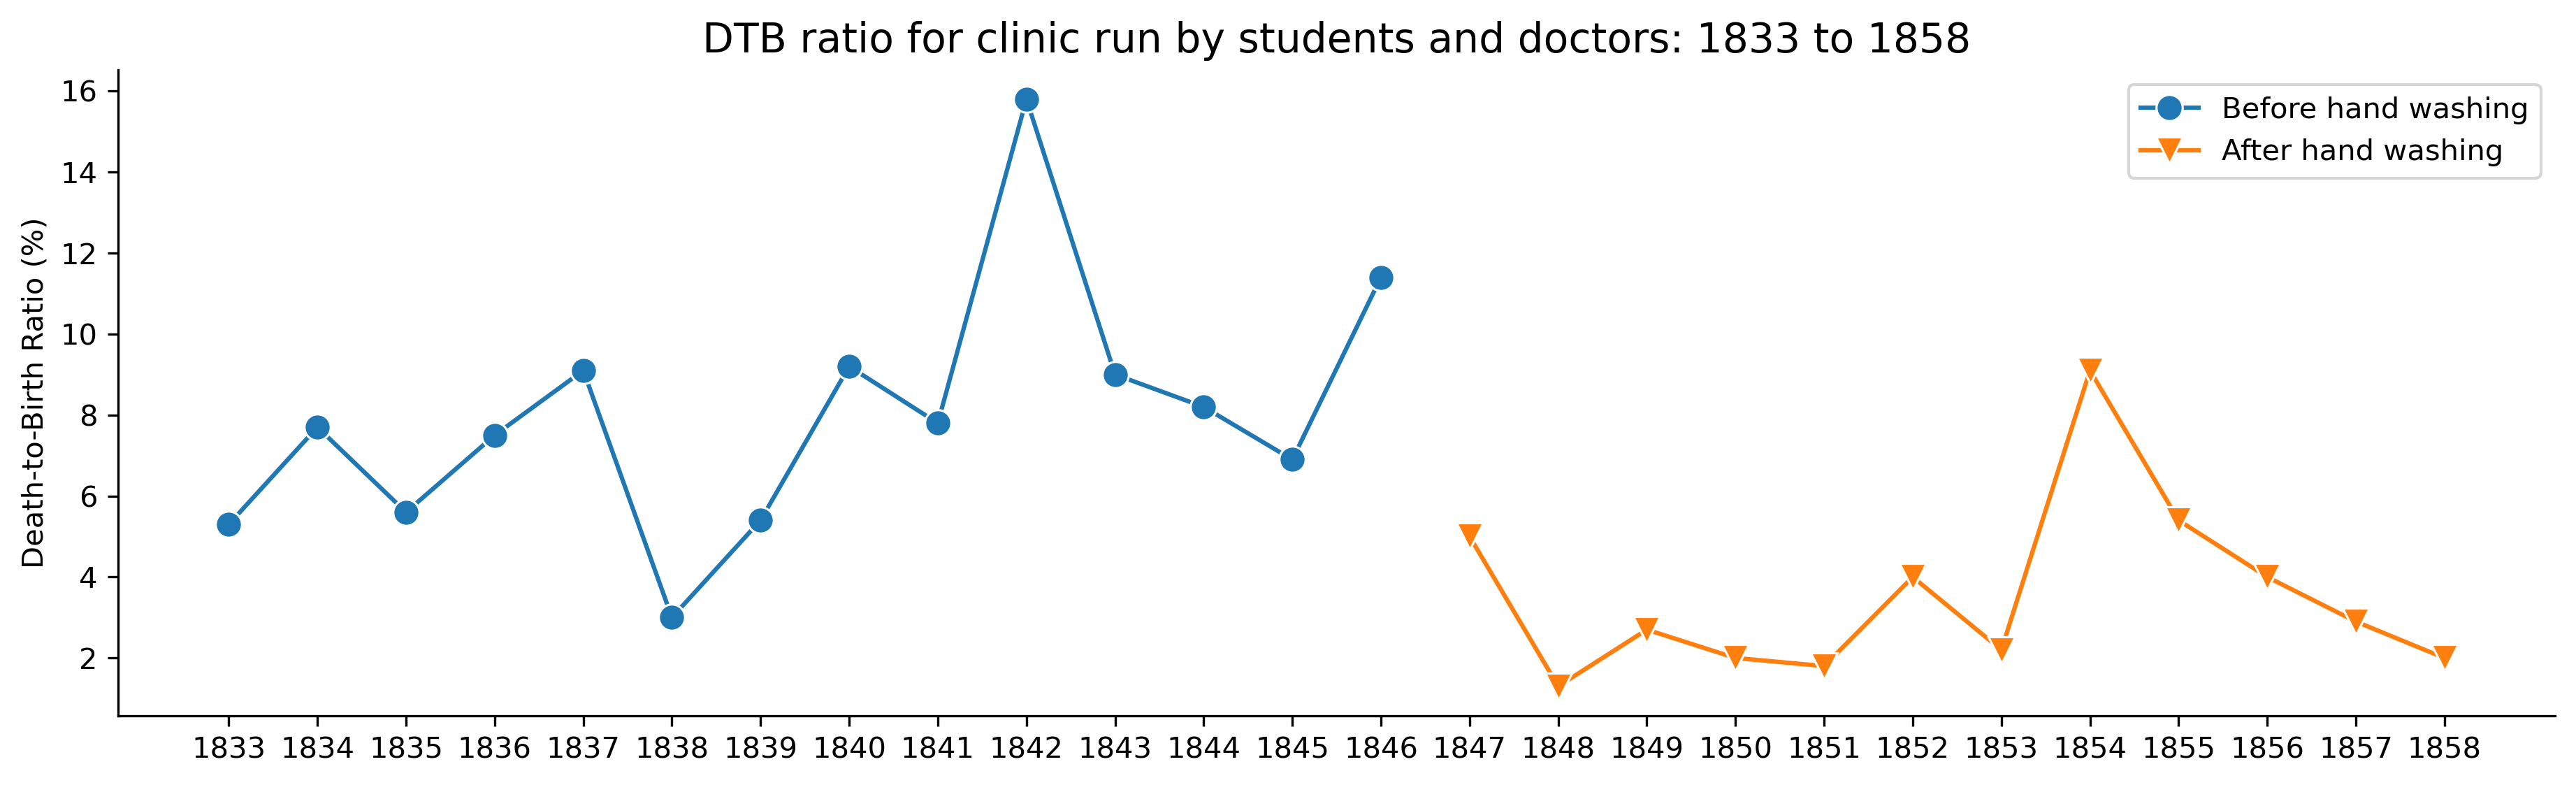

In [328]:
# Initialize the plot
fig, ax = plt.subplots(figsize=(15,4), dpi=300)

# Plot the first DataFrame
sns.lineplot(data=before_hand_washing, x='Year', y='Death-to-Birth Ratio (%)', 
             label='Before hand washing', marker='o', markersize=9)

# Plot the second DataFrame on the same axes
sns.lineplot(data=after_hand_washing, x='Year', y='Death-to-Birth Ratio (%)', 
             label='After hand washing', marker='v', markersize=9)

# Add title and labels
plt.title('DTB ratio for clinic run by students and doctors: 1833 to 1858', fontsize=14)
plt.xlabel('')
plt.ylabel('Death-to-Birth Ratio (%)')

ax.spines[['top','right']].set_visible(False)

# Display the plot
plt.show()

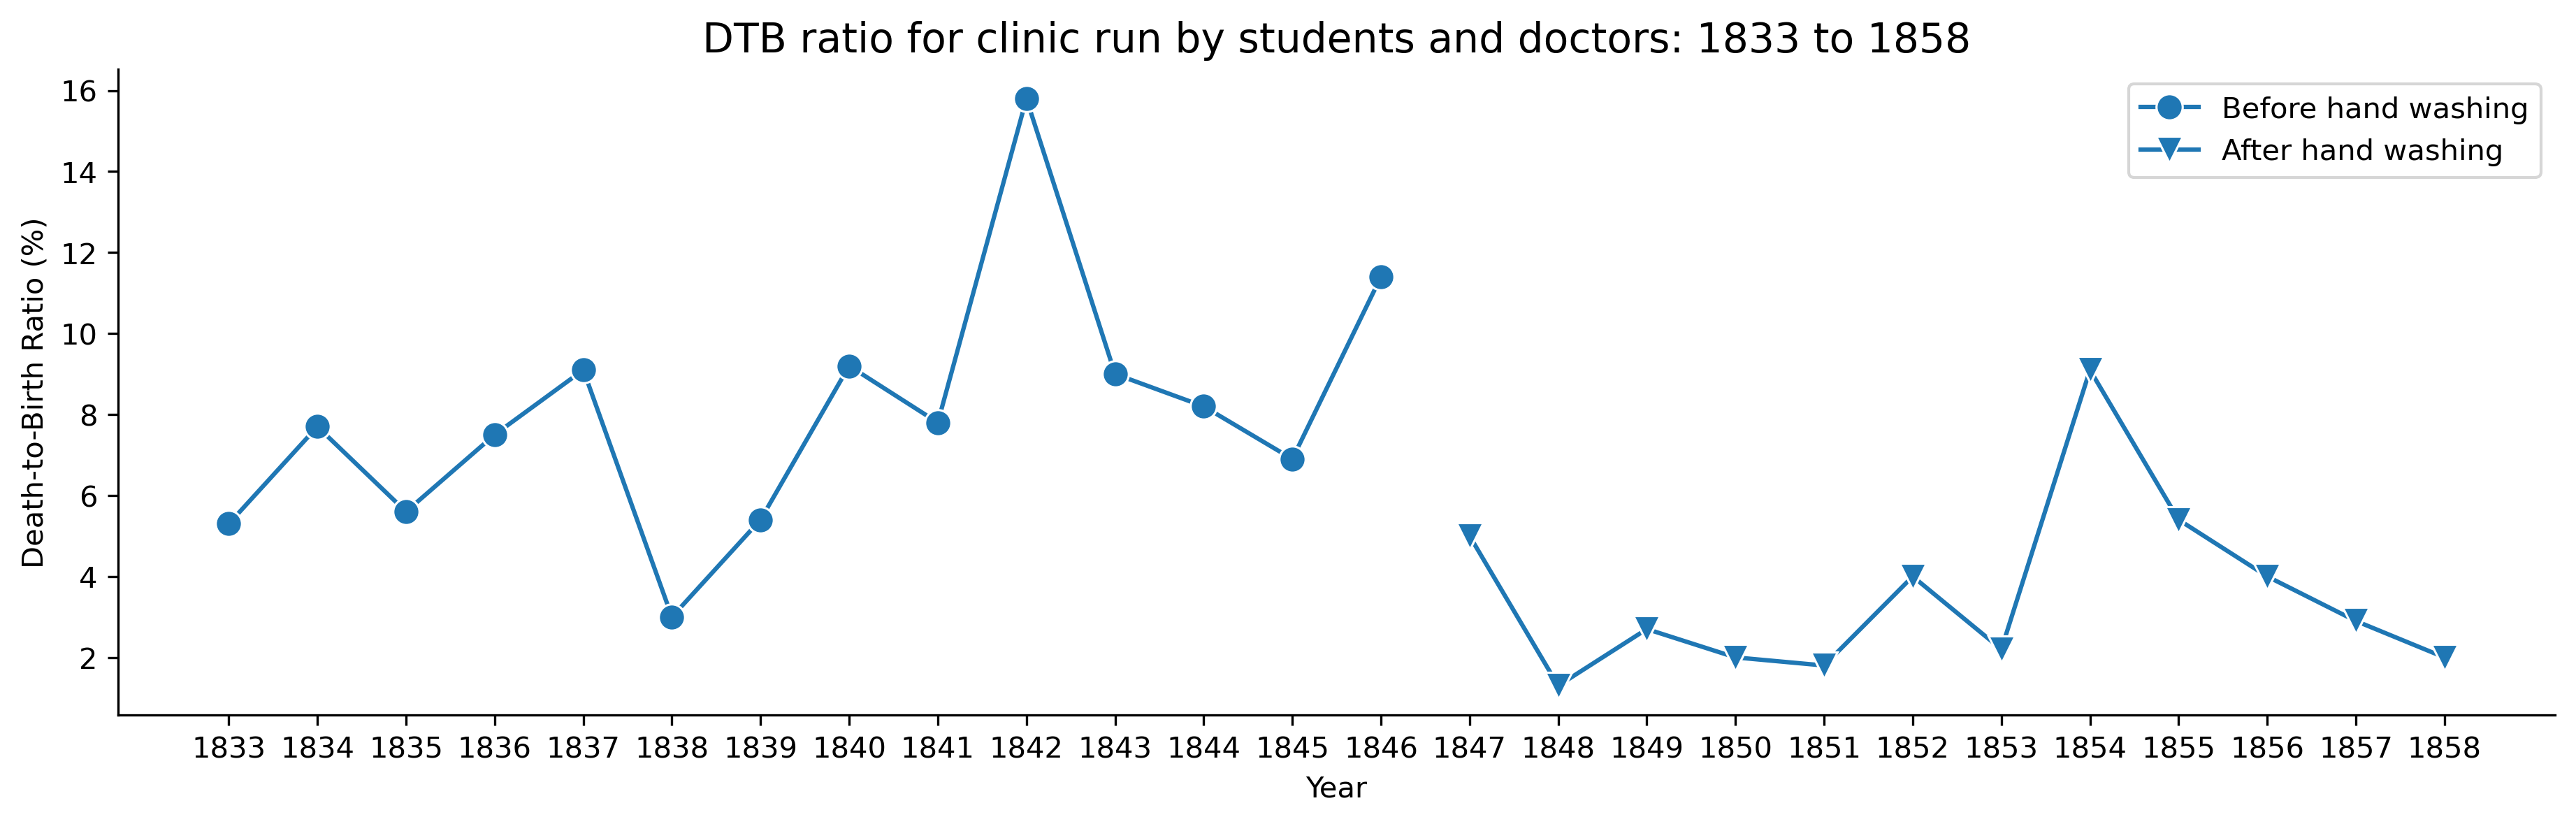

In [329]:
# Initialize the plot
fig, ax = plt.subplots(figsize=(15,4), dpi=300)

# Plot the first DataFrame
sns.lineplot(data=before_hand_washing, x='Year', y='Death-to-Birth Ratio (%)', 
             label='Before hand washing', marker='o', markersize=9)

# Plot the second DataFrame on the same axes
sns.lineplot(data=after_hand_washing, x='Year', y='Death-to-Birth Ratio (%)', 
             label='After hand washing', marker='v', markersize=9, color='tab:blue')

# Add title and labels
plt.title('DTB ratio for clinic run by students and doctors: 1833 to 1858', fontsize=14)
# plt.xlabel('X-axis')
plt.ylabel('Death-to-Birth Ratio (%)')

ax.spines[['top','right']].set_visible(False)

# Display the plot
plt.show()

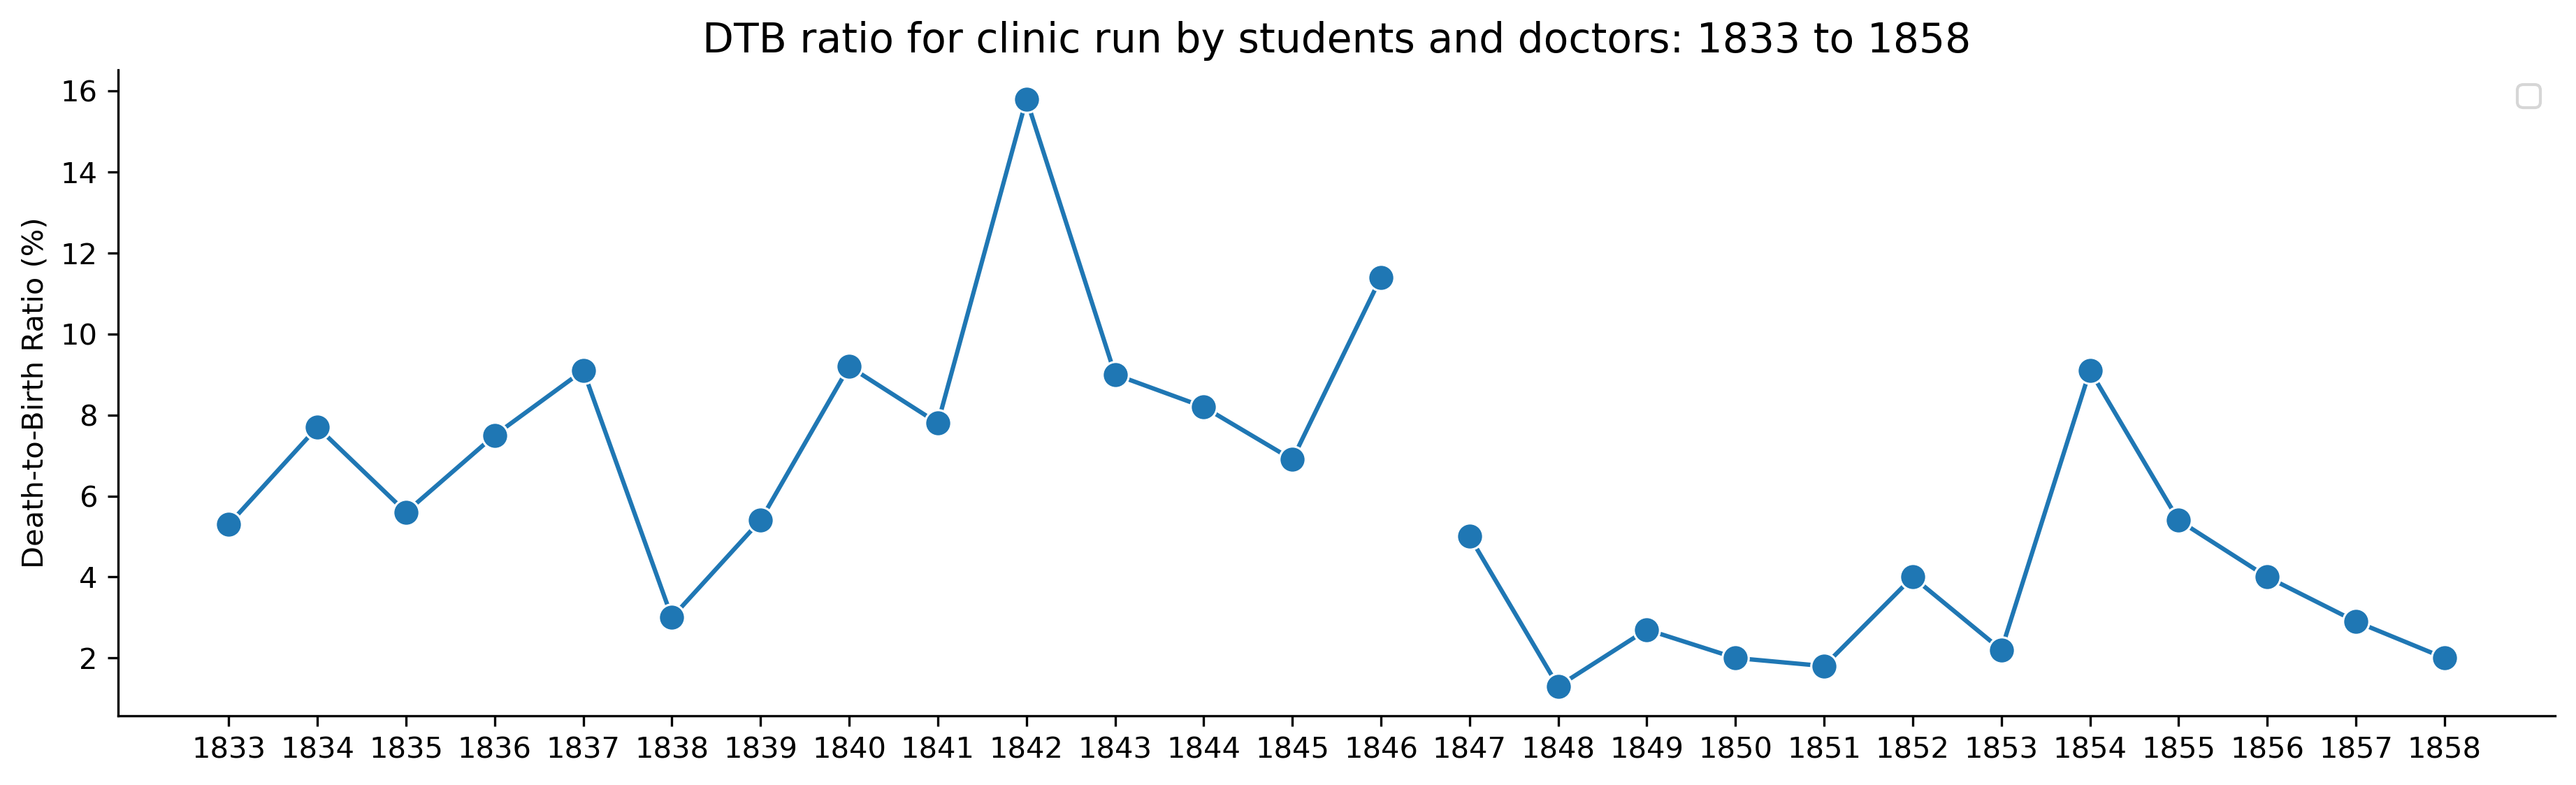

In [341]:
# Initialize the plot
fig, ax = plt.subplots(figsize=(15,4), dpi=300)

# Plot the first DataFrame
sns.lineplot(data=before_hand_washing, x='Year', y='Death-to-Birth Ratio (%)', 
             label='Before hand washing', marker='o', markersize=9)

# Plot the second DataFrame on the same axes
sns.lineplot(data=after_hand_washing, x='Year', y='Death-to-Birth Ratio (%)', 
             label='After hand washing', marker='o', markersize=9, color='tab:blue')

# Add title and labels
plt.title('DTB ratio for clinic run by students and doctors: 1833 to 1858', fontsize=14)
plt.xlabel('')
plt.ylabel('Death-to-Birth Ratio (%)')

ax.spines[['top','right']].set_visible(False)

ax.legend('')

# Display the plot
plt.show()

In [330]:
# Calculate the mean for each period
mean_before = before_hand_washing['Death-to-Birth Ratio (%)'].mean()
mean_after = after_hand_washing['Death-to-Birth Ratio (%)'].mean()

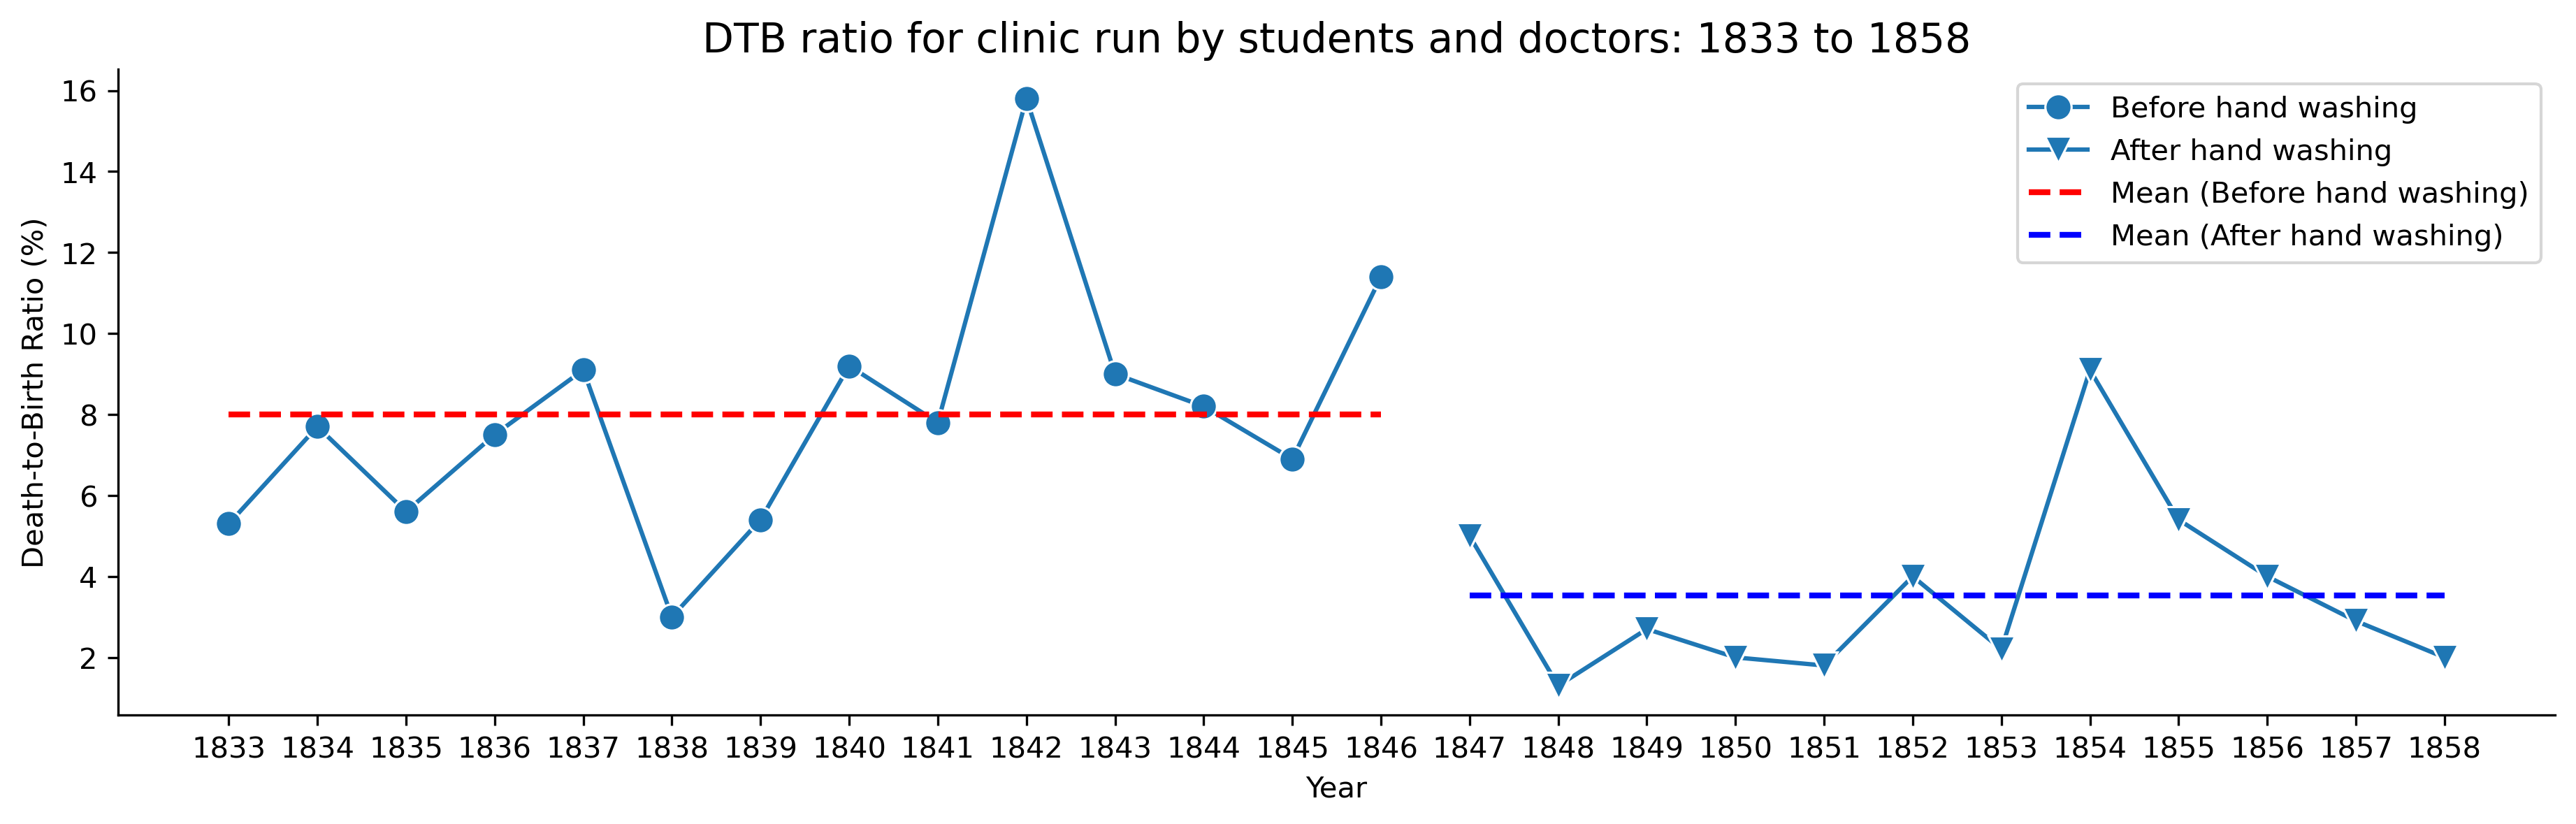

In [331]:
# Initialize the plot
fig, ax = plt.subplots(figsize=(15, 4), dpi=300)

# Plot the first DataFrame
sns.lineplot(data=before_hand_washing, x='Year', y='Death-to-Birth Ratio (%)', 
             label='Before hand washing', marker='o', markersize=9, ax=ax)

# Plot the second DataFrame on the same axes
sns.lineplot(data=after_hand_washing, x='Year', y='Death-to-Birth Ratio (%)', 
             label='After hand washing', marker='v', markersize=9, color='tab:blue', ax=ax)

# Add horizontal lines for the means
ax.hlines(y=mean_before, xmin=before_hand_washing['Year'].min(), xmax=before_hand_washing['Year'].max(), 
          color='red', linestyle='--', linewidth=2, label='Mean (Before hand washing)')

ax.hlines(y=mean_after, xmin=after_hand_washing['Year'].min(), xmax=after_hand_washing['Year'].max(), 
          color='blue', linestyle='--', linewidth=2, label='Mean (After hand washing)')

# Add title and labels
plt.title('DTB ratio for clinic run by students and doctors: 1833 to 1858', fontsize=14)
plt.ylabel('Death-to-Birth Ratio (%)')

# Remove top and right spines
ax.spines[['top', 'right']].set_visible(False)

# Add legend
ax.legend()

# Display the plot
plt.show()

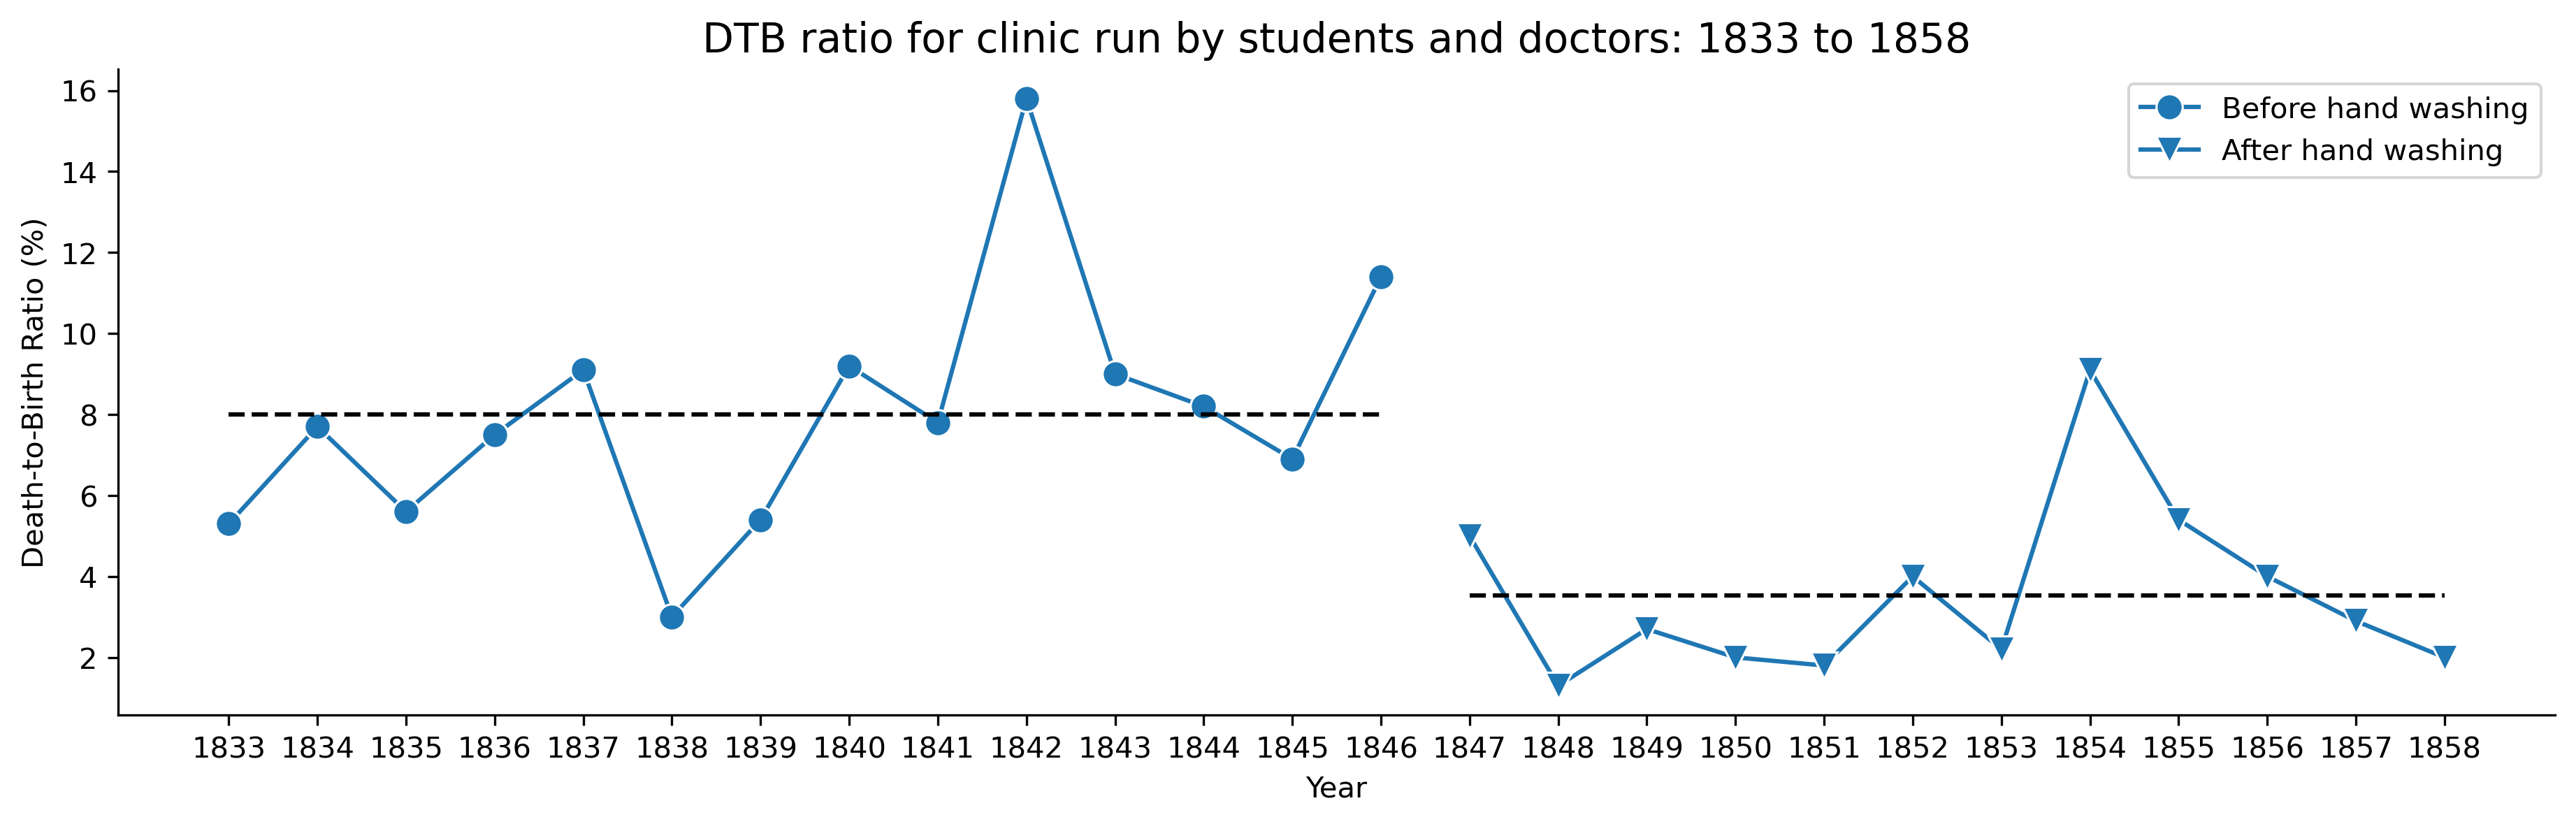

In [333]:
# Initialize the plot
fig, ax = plt.subplots(figsize=(15, 4), dpi=300)

# Plot the first DataFrame
sns.lineplot(data=before_hand_washing, x='Year', y='Death-to-Birth Ratio (%)', 
             label='Before hand washing', marker='o', markersize=9, ax=ax)

# Plot the second DataFrame on the same axes
sns.lineplot(data=after_hand_washing, x='Year', y='Death-to-Birth Ratio (%)', 
             label='After hand washing', marker='v', markersize=9, color='tab:blue', ax=ax)

# Add horizontal lines for the means
ax.hlines(y=mean_before, xmin=before_hand_washing['Year'].min(), xmax=before_hand_washing['Year'].max(), 
          color='black', linestyle='--')

ax.hlines(y=mean_after, xmin=after_hand_washing['Year'].min(), xmax=after_hand_washing['Year'].max(), 
          color='black', linestyle='--')

# Add title and labels
plt.title('DTB ratio for clinic run by students and doctors: 1833 to 1858', fontsize=14)
plt.ylabel('Death-to-Birth Ratio (%)')

# Remove top and right spines
ax.spines[['top', 'right']].set_visible(False)

# Add legend
ax.legend()

# Display the plot
plt.show()

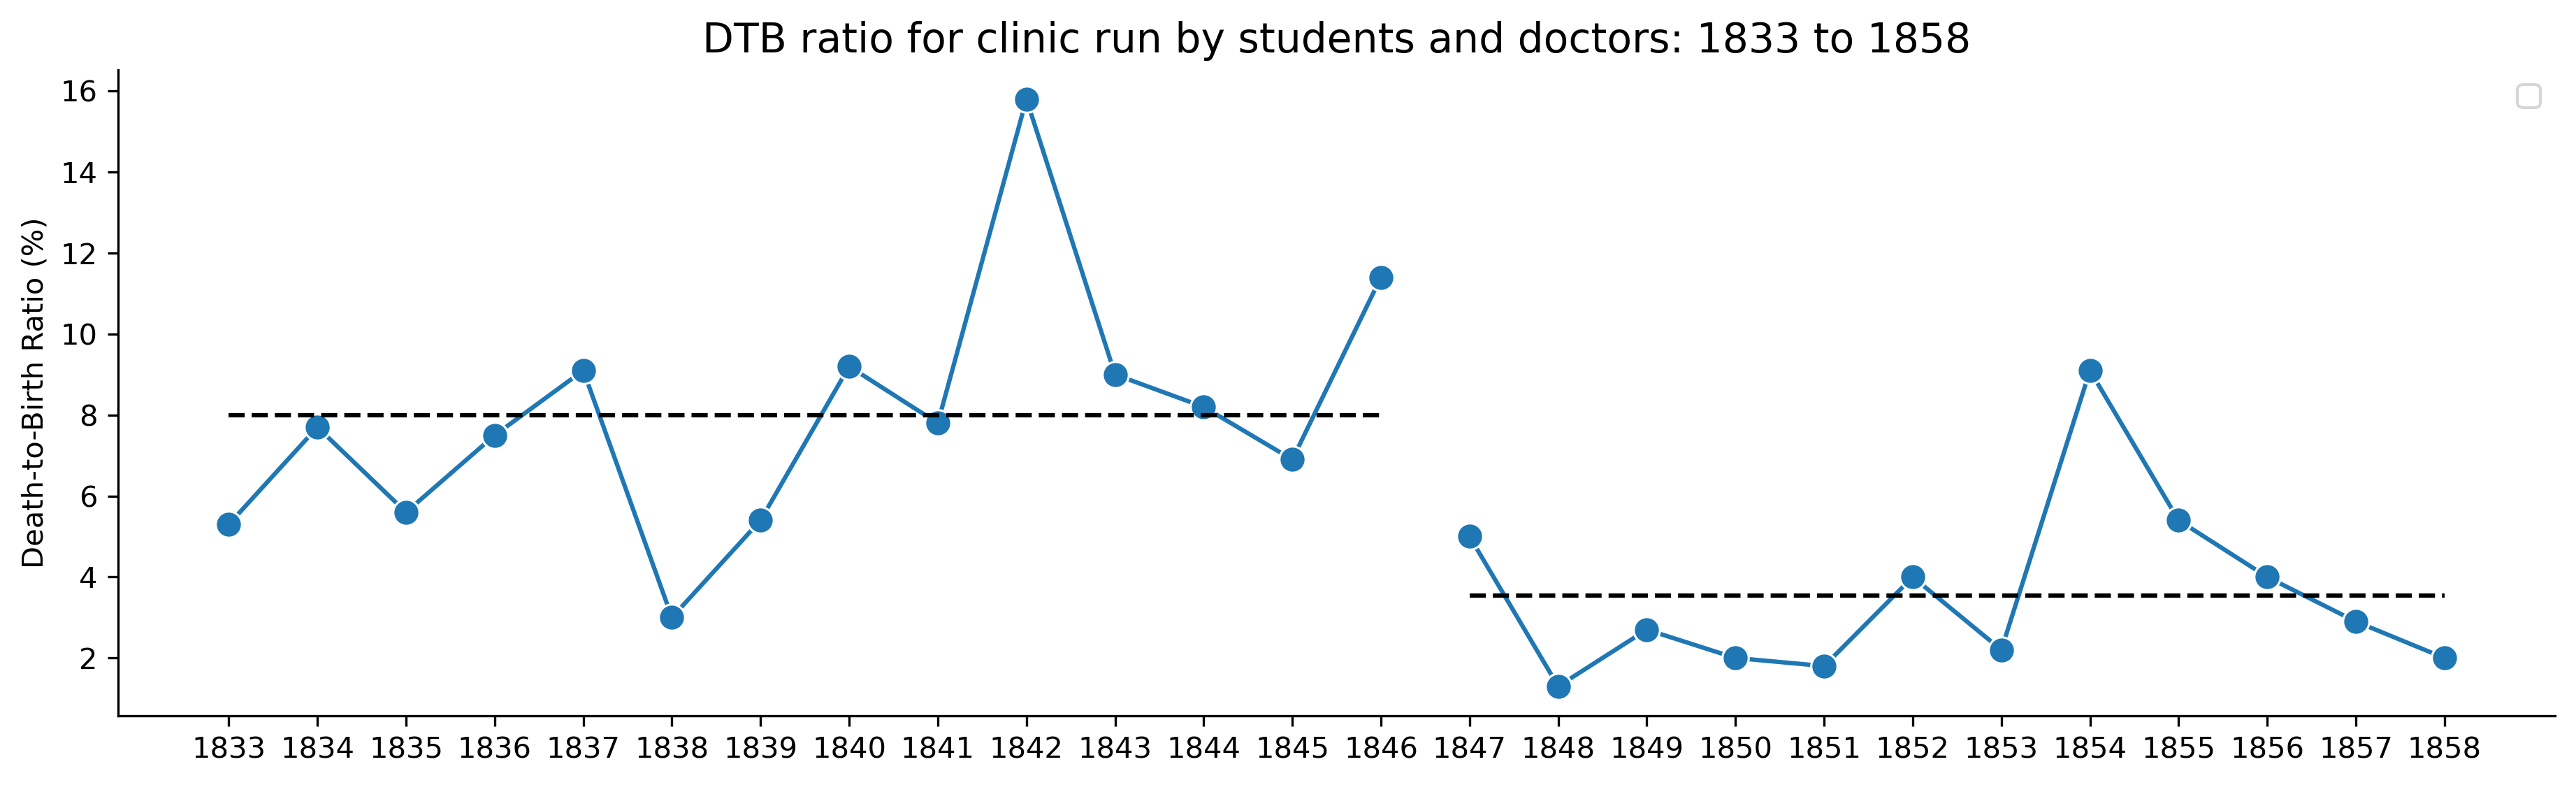

In [346]:
# Initialize the plot
fig, ax = plt.subplots(figsize=(15, 4), dpi=300)

# Plot the first DataFrame
sns.lineplot(data=before_hand_washing, x='Year', y='Death-to-Birth Ratio (%)', 
             label='Before hand washing', marker='o', markersize=9, ax=ax)

# Plot the second DataFrame on the same axes
sns.lineplot(data=after_hand_washing, x='Year', y='Death-to-Birth Ratio (%)', 
             label='After hand washing', marker='o', markersize=9, color='tab:blue', ax=ax)

# Add horizontal lines for the means
ax.hlines(y=mean_before, xmin=before_hand_washing['Year'].min(), xmax=before_hand_washing['Year'].max(), 
          color='black', linestyle='--')

ax.hlines(y=mean_after, xmin=after_hand_washing['Year'].min(), xmax=after_hand_washing['Year'].max(), 
          color='black', linestyle='--')

# Add title and labels
plt.title('DTB ratio for clinic run by students and doctors: 1833 to 1858', fontsize=14)
plt.ylabel('Death-to-Birth Ratio (%)')

# Remove top and right spines
ax.spines[['top', 'right']].set_visible(False)

ax.set_xlabel('')

# Add legend
ax.legend('')

# Display the plot
plt.show()

In [301]:
# Split first_clinic dataframe according to before and after handwashing
# before_hand_washing = first_clinic[:15]
# after_hand_washing = first_clinic[15:].reset_index(drop=True)

# Combine into lists
df_list = [before_hand_washing, after_hand_washing]

# Create list of comparison labels
label_list = ['Before hand washing','After hand washing']



In [302]:
# before_hand_washing

In [303]:
# after_hand_washing

C:\Users\james\AppData\Local\Temp\ipykernel_18728\3111390124.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Year'])  # Rotate labels for better readability


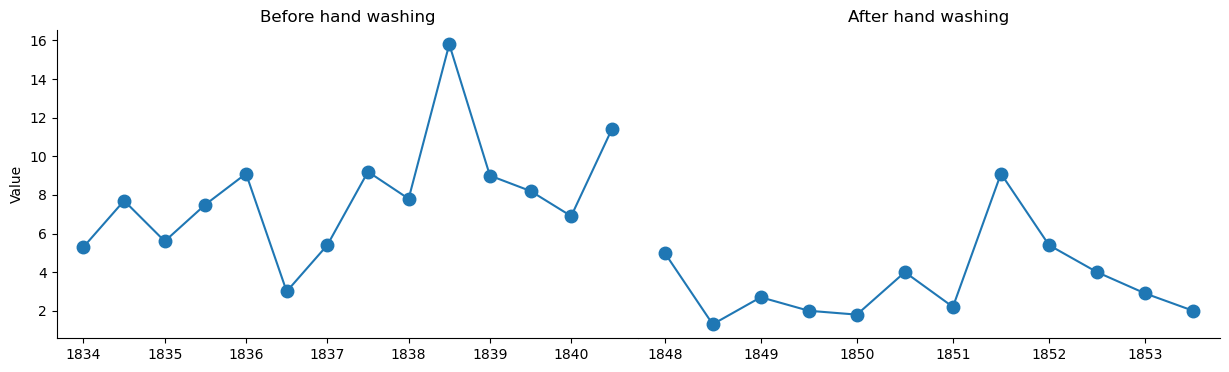

In [308]:
# split time series
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,4), sharey=True)

plt.subplots_adjust(wspace=0)

# Plot each dataframe in a separate subplot
for ax, df, title in zip(axs, df_list, label_list):
    ax.plot(df.index, df['Death-to-Birth Ratio (%)'], label='Year',
           marker='o', markersize=9)
    ax.set_title(title)  # Set the title for each subplot
    axs[0].set_ylabel('Value')
    
    # Set xticks to be the values from the 'Year' column
#     ax.set_xticks(df['Year'])  # Use this to set the tick positions directly
    
    # Optionally, set xticklabels if you want to ensure they match exactly
    ax.set_xticklabels(df['Year'])  # Rotate labels for better readability
    
    ax.spines[['top','right']].set_visible(False)
    axs[1].spines['left'].set_visible(False)
    axs[1].tick_params(left=False)

plt.show()

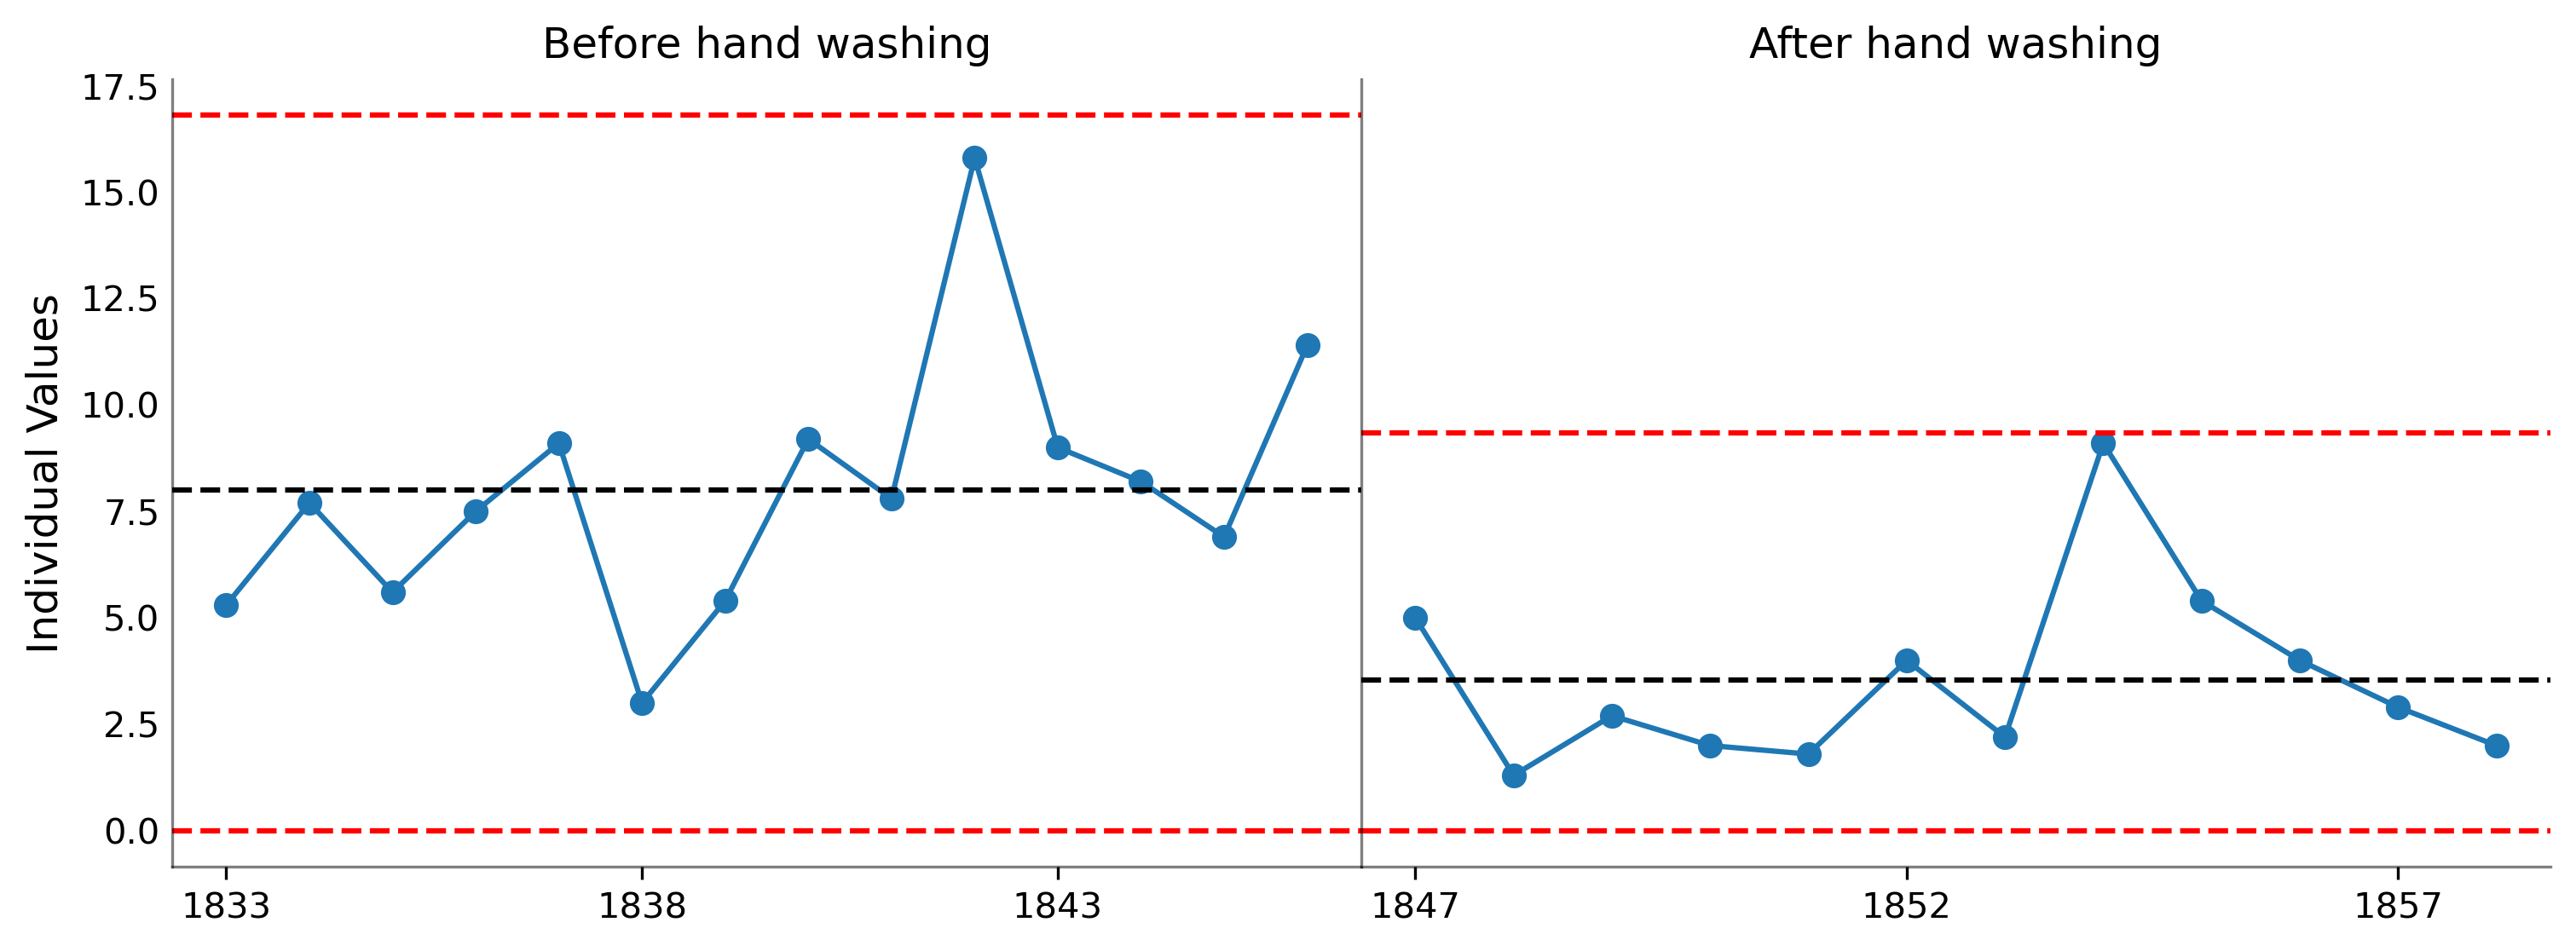

In [237]:
comparison_results = pi.xchart_comparison(df_list,'Death-to-Birth Ratio (%)', 'Year',
                     label_list)

In [238]:
# help(pi.xchart_comparison)
# comparison_results.set_index('Labels',inplace=True)
comparison_results

,Labels,Mean,UPL,LPL,PLR,AmR,URL,Characterization
0,Before hand washing,7.992857,16.81178,0,16.81178,3.315385,10.834677,Predictable
1,After hand washing,3.533333,9.33697,0,9.33697,2.181818,7.130182,Predictable


In [246]:
mean_PLR = comparison_results[['Labels','Mean','PLR']]
# mean_PLR.reset_index(inplace=True)
mean_PLR

,Labels,Mean,PLR
0,Before hand washing,7.992857,16.81178
1,After hand washing,3.533333,9.33697


In [247]:
mean_PLR_T = mean_PLR.T
mean_PLR_T

,0,1
Labels,Before hand washing,After hand washing
Mean,7.992857,3.533333
PLR,16.81178,9.33697


In [240]:
# mean_PLR = comparison_results[['Mean','PLR']]

# mean_PLR_T = mean_PLR.T
# mean_PLR_T.reset_index(inplace=True)
# mean_PLR_T.rename(columns={'index': 'Statistic'}, inplace=True)
# mean_PLR_T

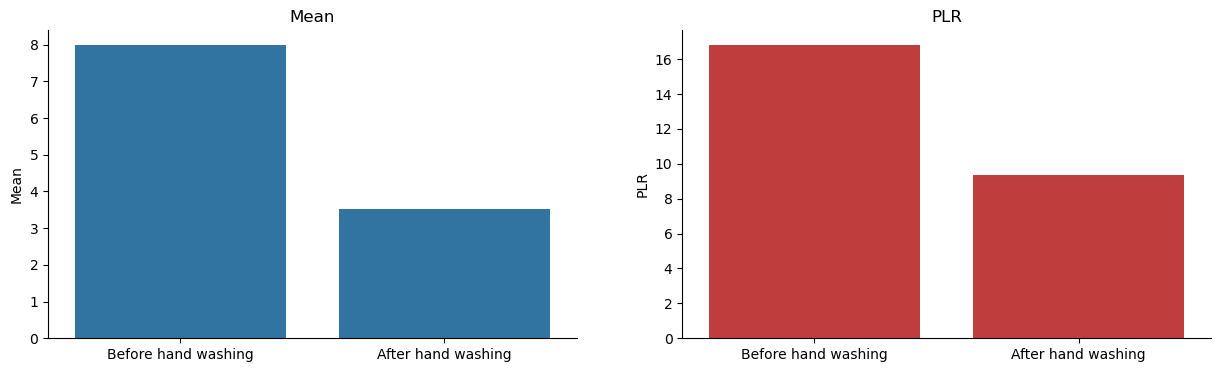

In [263]:
# Measures of location 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

sns.barplot(data=comparison_results, x='Labels', y='Mean', ax=axs[0], 
            color='tab:blue')
sns.barplot(data=comparison_results, x='Labels', y='PLR', 
            ax=axs[1], color='tab:red')

titles=['Mean', 'PLR']

for i,title in zip(range(0,2),titles):
    axs[i].spines[['top','right']].set_visible(False)
    axs[i].set_xlabel('')
    
axs[0].set_title('Mean')
axs[1].set_title('PLR')

plt.show()

In [194]:
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, errcolor='.26', errwidth=None, capsize=None, dodge=True, ci='deprecated', ax=None, **kwargs)
    Show point estimates and errors as rectangular bars.
    
    A bar plot represents an estimate of central tendency for a numeric
    variable with the height of each rectangle and provides some indication of
    the uncertainty around that estimate using error bars. Bar plots include 0
    in the quantitative axis range, and they are a good choice when 0 is a
    meaningful value for the quantitative variable, and you want to make
    comparisons against it.
    
    For datasets where 0 is not a meaningful value, a point plot will allow you
    to focus on differences between levels of one or more categorical
    varia